<a href="https://colab.research.google.com/github/shivam887423/CAPSTONE-2/blob/main/ML_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary**

**Rossman  sales Prediction data is a dataset that include ancient income facts for a retail save chain. The information consists of facts approximately the store, which includes Competitior’s element, type, vacation’s, as well as number of the customers and income transaction, which includes the date, time, and quantity of sale on each day.**

**After understanding the information and getting variables, we first accumulated and smooth the information, and dealt with the null values. We carried out indepth EDA plotted extraordinary forms of graphs by means of isolating them into univariate, bivariate and multivariate categories and we accumulated many appropriate insights from it that helped us to make future decisions of ML model pipeline. In order to get normally distributed data we have applied various transformation techniques such as Logarithmic Transformation, Exponential Transformation, Square root Transformation and others as well and plotted the quantie-quantile plot for visualizing how far our data points are from the normal distributions. For other data on same scale we have used the sklearn library StandardScaler to scale the data.**

**Then further on, the usage of feature engineering and facts preprocessing we have extracted features like PromoDuration and CompetitionDuration that helped us to get rid of some 4 capabilities that aren't without delay impacting our income. We additionally tried to get a few impacting capabilities via eliminating multicollinearity by lowering the diverse inflation aspect(VIF) of the unbiased variables.** 

**At ultimate we splited the dataset into schooling and checking out setsNext, we pick out diverse linear and non linear supervised system getting to know algorithms and use the training data to teach the model.Eventually, we evaluated the version's performance on the testing facts to peer how properly it could are expecting the income for the real time facts. For this mission we used many machine mastering algorithms, which include linear regression, decision bushes, random forests.In the beginning as our data is not perfectly linearly dependent , we have achieved 93% accuracy with the r2 score of 0.82 even after using regularization techniques i.e Lasso, Ridge and even Elastic Net in linear regression model. We knew that complex model do not have underlying statistical assumptions so we were expecting more significant results in higher comlex model. In Decsion Tree we have achieved approx 94% accuracy by capturing 91% of the variance with maximum depth of 16. On increasing the depth over it we are falling towards overfitting which ultimately increases the variance error. We have also tried Random Forset mode   we got the similar results as Random Forest (~95%)**

**Universal, whilst constructing a machine getting to know model on Rossman income Prediction statistics we carried out combination of facts processing, device getting to know techniques, and version assessment competencies. It turned into a difficult undertaking and I have faced a few screw ups as well however with the proper method and knowledge,I was capable of create a model which can correctly are expecting sales upcomings weeks in advance.**

# **GitHub Link -**

https://github.com/shivam887423/CAPSTONE-2

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [136]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# importing missingo library which helps us to visualize the missing values
import missingno as msnull

# importing linear rigression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

### Dataset Loading

In [137]:
# Load Dataset
data_rossmann= pd.read_csv("/content/Rossmann Stores Data.csv")       #Rossman Dataset
data_store= pd.read_csv("/content/store.csv")                         #Store Dataset

### Dataset First View

In [138]:
# Dataset First Look for rossmann dataset
data_rossmann.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [139]:
# Dataset First Look for store dataset
data_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset last View

In [140]:
# Dataset Last Look for rossmann dataset
data_rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [141]:
# Dataset Last Look for store dataset
data_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [142]:
# lets know the shape and understand that how many rows and columns are there.
print(f'There are {data_rossmann.shape[0]} rows & {data_rossmann.shape[1]} columns in the Rossman Dataset')
print(f'There are {data_store.shape[0]} rows & {data_store.shape[1]} columns in the Store Dataset')

There are 1017209 rows & 9 columns in the Rossman Dataset
There are 1115 rows & 10 columns in the Store Dataset


### Dataset Information

In [143]:
# Dataset Info for Rossman Dataset
data_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [144]:
# Dataset Info for StoreDataset
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

For Rossman Dataset

In [145]:
# Dataset Duplicate Value Count for Rossman Dataset & lets indentify the duplicate values in each columns
duplicate_columns=data_rossmann[data_rossmann.duplicated()]
print(data_rossmann.count())
print(f"Number of duplicated rows in Rossmann dataset: {data_rossmann.duplicated().sum()}")

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64
Number of duplicated rows in Rossmann dataset: 0


 For Store Dataset

In [146]:
# Dataset Duplicate Value Count for Store Dataset & lets indentify the duplicate values in each columns
duplicate_columns=data_store[data_store.duplicated()]
print(data_store.count())
print(f"Number of duplicated rows in Rossmann dataset: {data_store.duplicated().sum()}")

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1112
CompetitionOpenSinceMonth     761
CompetitionOpenSinceYear      761
Promo2                       1115
Promo2SinceWeek               571
Promo2SinceYear               571
PromoInterval                 571
dtype: int64
Number of duplicated rows in Rossmann dataset: 0


**INFERENCE**

*   There is no any duplicate value in both the dataset which makes the dataset more easier for us.



#### Missing Values/Null Values

 For Rossman Dataset

In [147]:
# Missing Values/Null Values Count
data_rossmann.isna().sum().sort_values(ascending=False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<AxesSubplot:>

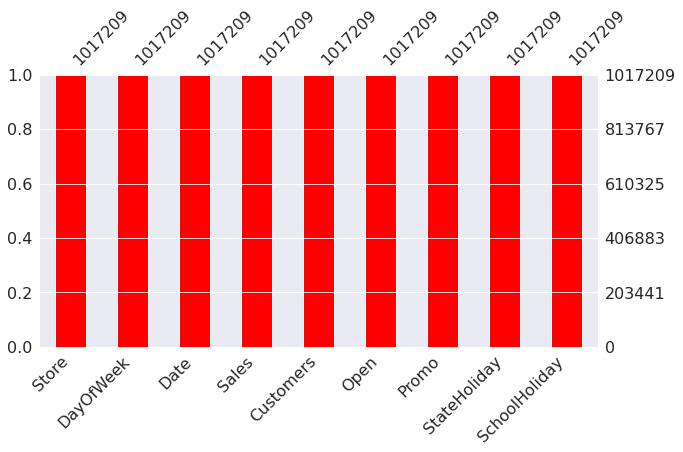

In [148]:
# Visualizing the missing values
msnull.bar(data_rossmann,figsize=(10,5),color="Red")

For Store Dataset

In [149]:
# Missing Values/Null Values Count
data_store.isna().sum().sort_values(ascending=False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

<AxesSubplot:>

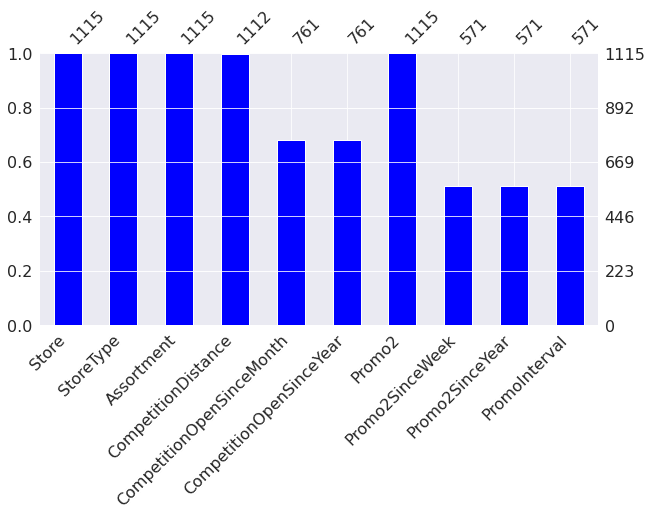

In [150]:
# Visualizing the missing values
msnull.bar(data_store,figsize=(10,5),color="Blue")

**INFERENCE**

**1.   We don't have null or infinite values Rossmann's dataset.**

**2.   We have some null values in Store dataset and we will remove it in later**




### What did you know about your dataset?

Until now we get to know the subsequent points about our dataset:

**'Rossmann Dataset'**

*   This dataset is having 1017209 rows and 9 columns.
*   This dataset does not contain any null value.
*   There is no duplicate values present in the datasets.



**'Stores Dataset'**

*   This dataset is having 1115 rows and 10 columns.
*   It carries null values in overall six capabilities i.e. **Promo2SinceWeek**, **Promo2SinceYear**, **PromoInterval**, **CompetitionOpenSinceMonth**, **CompetitionOpenSinceYear**,  **CompetitionDistance**.
*   There is no duplicate values present in the datasets.


## ***2. Understanding Your Variables***

For Rossmann Dataset

In [151]:
# Dataset Columns
print(f"Column names of Rossmann dataset is:\n{data_rossmann.columns.tolist()}")

Column names of Rossmann dataset is:
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [152]:
# Dataset Describe
data_rossmann.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


For store dataset

In [153]:
# Dataset Columns
print(f"Column names of Store dataset is:\n{data_store.columns.tolist()}")

Column names of Store dataset is:
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [154]:
# Dataset Describe
data_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

###**Rossmann Stores Data.csv** - historical data including Sales

###**Store.csv** - supplemental information about the stores

###**Data fields**

**Id**- an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales**- the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday.

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

For Rossmann Dataset

In [155]:
# Check Unique Values for each variable.
for col in data_rossmann.columns:                            # Loop through columns and print unique values
    unique_vals = data_rossmann[col].unique()
    print(f"Unique values for column '{col}': {unique_vals}")

Unique values for column 'Store': [   1    2    3 ... 1113 1114 1115]
Unique values for column 'DayOfWeek': [5 4 3 2 1 7 6]
Unique values for column 'Date': ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29

For Rossmann Dataset

In [156]:
# Check Unique Values for each variable.
for col in data_store.columns:                            # Loop through columns and print unique values
    unique_vals = data_store[col].unique()
    print(f"Unique values for column '{col}': {unique_vals}")

Unique values for column 'Store': [   1    2    3 ... 1113 1114 1115]
Unique values for column 'StoreType': ['c' 'a' 'd' 'b']
Unique values for column 'Assortment': ['a' 'c' 'b']
Unique values for column 'CompetitionDistance': [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.

## 3. ***Data Wrangling***

### **A) Checking Null Values In Our Dataset**

In [157]:
#For Rossmann dataset
data_rossmann.isna().sum().sort_values(ascending=False)      #knowing the nulll value from descending order

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As we can see that in our rossmann Dataset we have zero null values.So no need to evaluate null values.

In [158]:
#For Store dataset
data_store.isna().sum().sort_values(ascending=False)      #knowing the nulll value from descending order

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

As we can see in our Store dataset we have too many null values.So we need to remove them for better result.

So we will devide our null values Dataset into 3 parts.

*   The First part we will look after the columns **Promo2SinceWeek**, **Promo2SinceYear** and  **PromoInterval**. 
*   The Second part we will be taking **CompetitionOpenSinceMonth** and  **CompetitionOpenSinceMonth**

*   The Third part we will take **CompetitionDistance** 






###1)  First Part i.e. **Promo2SinceWeek**, **Promo2SinceYear** and **PromoInterval**.

In [159]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0. 
data_store["Promo2SinceWeek"].fillna(0, inplace=True)
data_store["Promo2SinceYear"].fillna(0, inplace=True)
data_store["PromoInterval"].fillna(0, inplace=True)

In [160]:
#lets check if there is some null value left after filling it in dataset.
data_store.isna().sum().sort_values(ascending=False) 

CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

**Finally,We had filled the null values for the first part.** 

###2) Second Part i.e. **CompetitionOpenSinceMonth** and **CompetitionOpenSinceYear**

In [161]:
# filling null values of CompetitionOpenSinceMonth with mode 
data_store["CompetitionOpenSinceMonth"].fillna(data_store["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

In [162]:
# filling null values of CompetitionOpenSinceYear with mode
data_store["CompetitionOpenSinceYear"].fillna(data_store["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [163]:
#lets check if there is some null value left after filling it in dataset.
data_store.isna().sum().sort_values(ascending=False) 

CompetitionDistance          3
Store                        0
StoreType                    0
Assortment                   0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Finally, there is no null values in  the second part.**

###3) Third Part i.e. **CompetitionDistance** attribute.

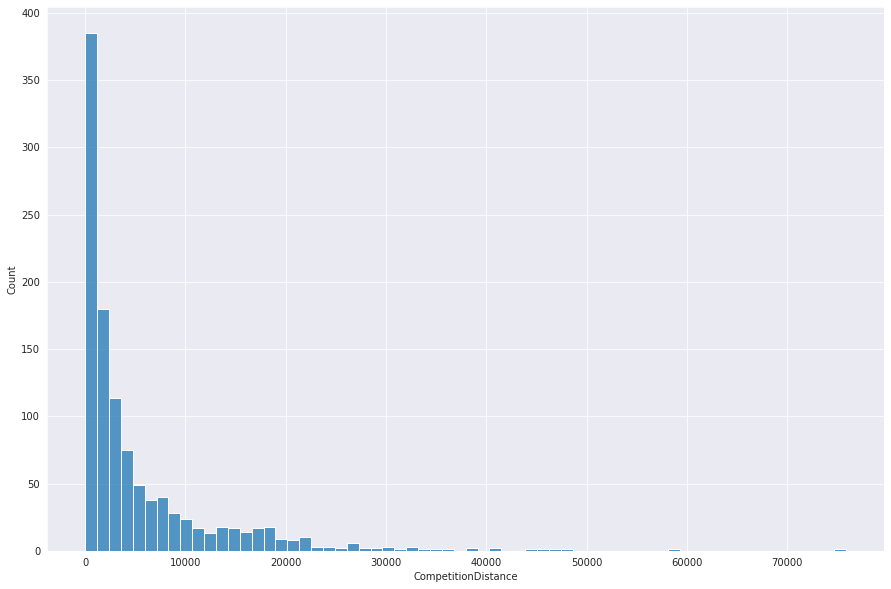

In [164]:
plt.figure(figsize=(15,10))
sns.histplot(x=data_store["CompetitionDistance"])
plt.show()

As we are able to see that the distribution seem like right skewed distribution. So we dicided to fill null values with median

In [165]:
#replacing Nan values in CompetitionDistance with median.
data_store['CompetitionDistance'].fillna(data_store['CompetitionDistance'].median(), inplace = True)

In [166]:
#lets check if there is some null value left after filling it in dataset.
data_store.isna().sum().sort_values(ascending=False)

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###Finally, there is no null values in oue Dataset. So we can move forward to our next step.

### **B)** **Merging The Two Dataset**

Using head function for Rossmann dataset

In [167]:
data_rossmann.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


using head Function for Store dataset 

In [168]:
data_store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


###As we can clearily see that the both the dataset has Store atrribute common, so we will merge both the Dataset by Store attribute. As we have no null value in our dataset we will use **Inner Join** to merge the dataset

In [169]:
#using inner join for our further analysis
data= pd.merge(data_rossmann, data_store, on="Store", how= "inner")

In [170]:
#checking the shape and knowing how many rows and columns are there.
print(f'There are {data.shape[0]} rows & {data.shape[1]} columns')

There are 1017209 rows & 18 columns


In [171]:
#checking info of our final merged dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

###**C)** **Typecasting The datatypes.**

In [172]:
#know the data 
data.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [173]:
# convert the 'Date' column to datetime format
from datetime import datetime
data['Date']= pd.to_datetime(data['Date'],errors='coerce')
#extracting year
data["Year"]= data["Date"].dt.year

float data can lead to error . So we will convert them into integers

In [174]:
data['CompetitionDistance']= data['CompetitionDistance'].astype(int)
data['CompetitionOpenSinceMonth']= data['CompetitionOpenSinceMonth'].astype(int)
data['CompetitionOpenSinceYear']= data['CompetitionOpenSinceYear'].astype(int)
data['Promo2SinceWeek']= data['Promo2SinceWeek'].astype(int)
data['Promo2SinceYear']= data['Promo2SinceYear'].astype(int)
     

In [175]:
#checking everything looks fine in our datset or not
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [176]:
from datetime import date as dt
data["Year"]= data["Date"].dt.year

In [177]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year'],
      dtype='object')

### What all manipulations have you done and insights you found?

As a part fo Data Wrangling, I did below data manipulations,

**Part A): Checked Null Values In Our Dataset** 

In **Rossmann Dataset** : There is no null value in this datset.

In **Store Dataset** : In this section I had devided into three parts.

Fisrt part i.e. **Promo2SinceWeek**, **Promo2SinceYear** and  **PromoInterval**. flled with 0.

Second part i.e.**CompetitionOpenSinceMonth** and  **CompetitionOpenSinceMonth** is filled with mode.

Third part i.e. **CompetitionDistance** is filled with median.

**Part B) : Merging The Two Dataset** 

In this section, I had first find the attribute which is common in both the dataset.So I found that the attribute store is common in both the datset. Then find the best fitt join to merge my both the datset into one.

**Part C) : Typecasting The Datatype**

In this part,the first step to find the datatype of the merged datatype.Then converted them into best fit dataypes. 

The **date** is converted into the **dateTime** formate. In which the **month** ,**year** and **dates** are extracted seperately. 

And the **CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear** attrbute are converted from float to Integer.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

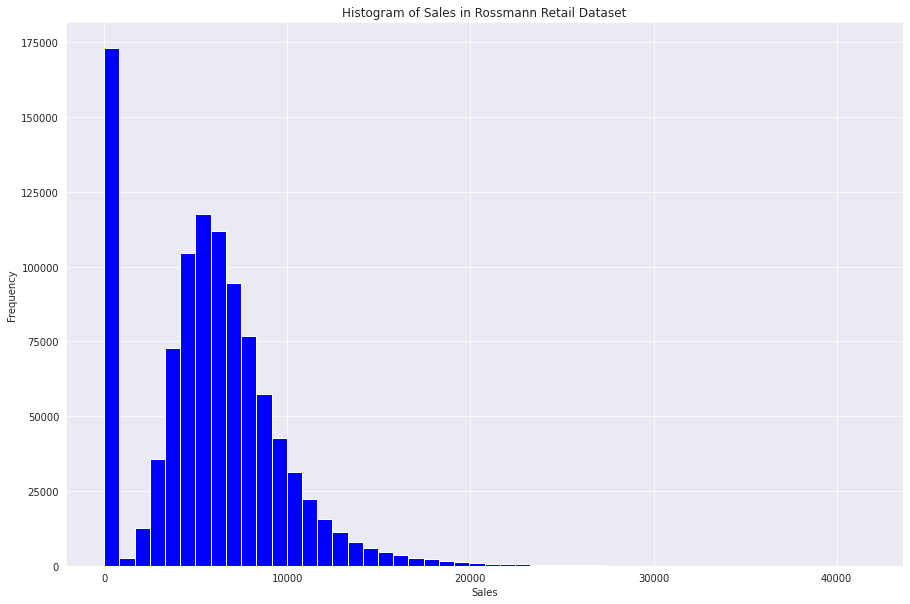

In [178]:
#Chart- We can create a histogram to show the distribution of sales in the dataset.
# Plot a histogram of sales
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(x=data['Sales'], bins=50, color='blue')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales in Rossmann Retail Dataset')
plt.show()



##### 1. Why did you pick the specific chart?

We picked up histplot as it is a quick and easy way to visualize the distribution of a dataset, which can help identify patterns, trends, and outliers.It is an chart that displays the distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?

*  From the histogram of Sales in the Rossmann retail dataset, we can see that the distribution is positively skewed, with the majority of sales falling in the range of approximately 0 to 20,000





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Overall, the insights gained from the histogram of sales in the Rossmann retail dataset can provide valuable information for retailers to make informed decisions and drive positive business impact, as long as they are used in a thoughtful and strategic way.

#### Chart - 2

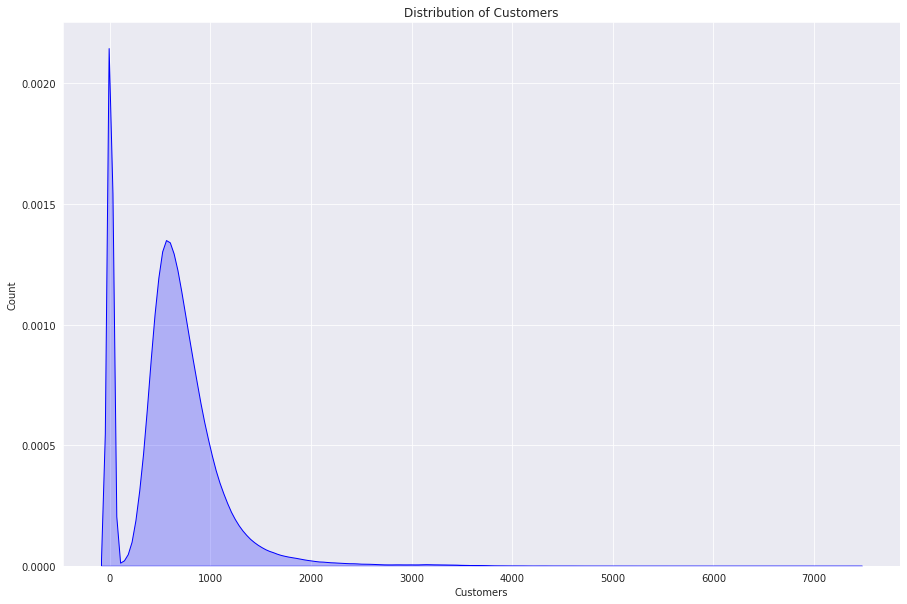

In [179]:
# Chart - seaborn's kdeplot to visualize the distribution of customers in the dataset.
plt.figure(figsize=(15,10))
sns.kdeplot(data["Customers"], color="Blue", shade = True)
plt.title('Distribution of Customers')
plt.xlabel('Customers')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

We picked this chart as it tells us that how the customers are distributed. I had used KDE graphs as they provide a useful visualization for the distribution of a continuous variable.

##### 2. What is/are the insight(s) found from the chart?

*  We can clearly see that the average distribution of customers is nearly approx 1000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We Plotted the frequency distributed graph for customer attribute. Accordingly we came to realize that the disribution of clients are broadly in 1000 range. So commercial enterprise have to plan specific strategies to maintain inside the aggressive market.

#### Chart - 3

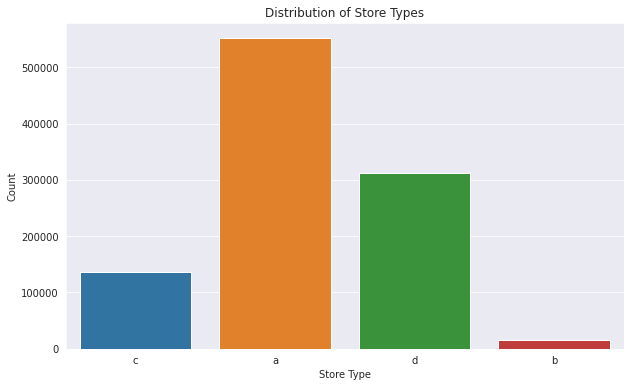

In [180]:
#Chart- We can use seaborn's countplot to visualize the count of store type in the dataset.
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(x="StoreType", data=data)
plt.title("Distribution of Store Types")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a bar plot for the StoreType variable because it is a categorical variable with a limited number of unique values (A, B, C, and D). A bar plot is an effective way to visualize the frequency distribution of categorical variables, and it allows us to compare the count of each category easily.

##### 2. What is/are the insight(s) found from the chart?

The insight from the bar plot of the StoreType variable is that store type A is the most common type of store in the Rossmann retail dataset, followed by store type D, B, and C. This information can be useful for understanding the distribution of store types in the dataset and for comparing the performance of different store types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the bar plot of the StoreType variable can help create a positive business impact by providing information on the distribution of store types in the dataset and allowing us to compare the performance of different store types.

#### Chart - 4

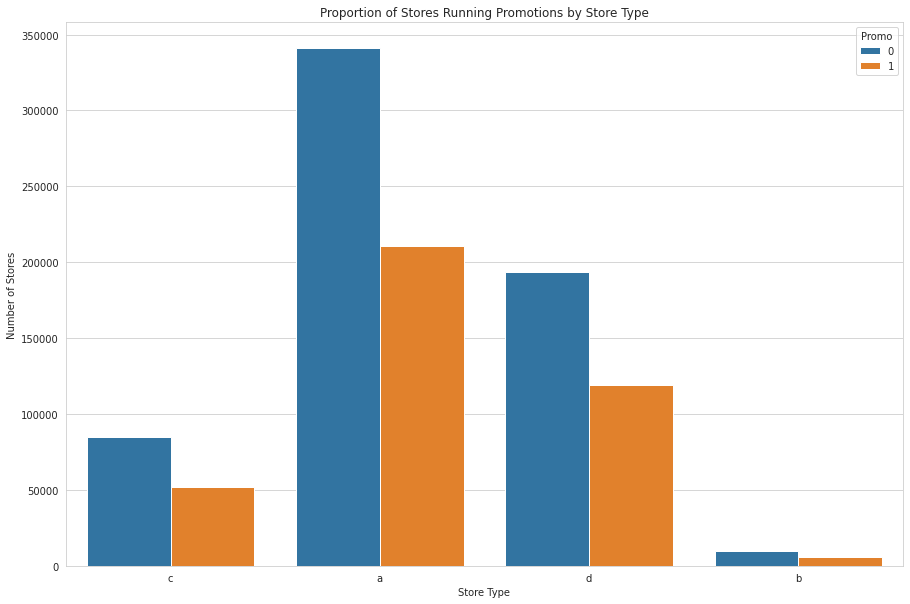

In [181]:
# Chart - We can use seaborn's countplot to visualize the count of stores with and without promotions.

fig, ax = plt.subplots(figsize=(15, 10))

# create a stacked bar chart of the Promo variable by store type
sns.countplot(x='StoreType', hue='Promo', data=data)

# add title and axis labels
plt.title('Proportion of Stores Running Promotions by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')

# display the plot
plt.show()






##### 1. Why did you pick the specific chart?

I picked the count bar chart because it can effectively display the relationship between the Promo variable and the categorical variable StoreType



##### 2. What is/are the insight(s) found from the chart?

* Store type a has the highest number of stores running promotions, followed by store type d, c, and b.

* For store types a, b, and d, the number of stores running promotions is higher than the number of stores not running promotions.

* For store type c, the number of stores running promotions is roughly the same as the number of stores not running promotions.

* Overall, the proportion of stores running promotions is higher than the proportion of stores not running promotions for all store types except c.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the stacked bar chart of the Promo variable by StoreType can potentially create a positive business impact for retailers.For example, increasing the number of stores running promotions in store types c and b can lead to increased sales and customer engagement. Replicating successful promotion strategies from store type a can also lead to increased sales in other store types.

There are no insights from this chart that would lead to negative growth

###Since in our dataset sales is the target coulmn . So we will see every possible relation between the sales column with every columns.
**Bivirate Analysis**

#### Chart - 5

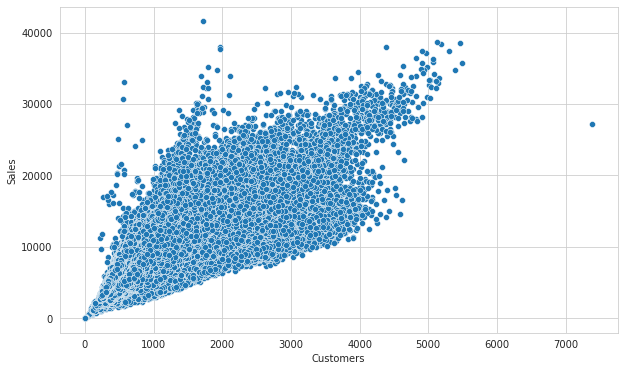

In [182]:
# Chart - Scatter plot of Sales vs. Customers:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='Customers', y='Sales', data=data)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot of Sales vs. Customers is a useful bivariate plot to visualize the relationship between the two variables.Sales and Customers are both important metrics for retail stores, and understanding the relationship between them can provide insights into the effectiveness of a store's marketing strategies and customer engagement

##### 2. What is/are the insight(s) found from the chart?

This above scatterplot show a positive correlation between 'Sales' and 'Customers'.As the number of customers increases, the sales also tend to increase.This positive correlation is a good indicator that the store is effectively engaging with customers and meeting their needs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from a scatter plot of Sales vs. Customers can help create a positive business impact if the insights are used effectively to improve business strategies and outcomes.This insight can be used to develop marketing strategies that attract more customers and increase sales.

#### Chart - 6

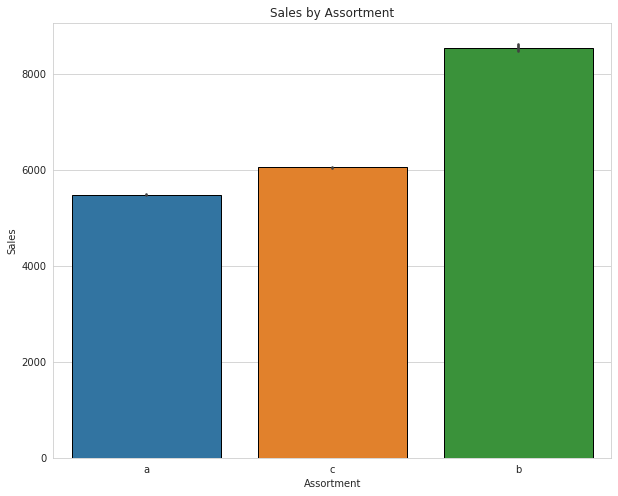

In [183]:
# Chart - relationship between Sales and Assortment
fig, ax = plt.subplots(figsize=(10, 8))
plots=sns.barplot(x=data['Assortment'],y=data['Sales'],edgecolor='black')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a bar plot to visualize Sales by Assortment because it is a simple and effective way to compare the average Sales across different Assortment categories. The bars represent the Sales for each Assortment category, and the heights of the bars directly correspond to the Sales values.

##### 2. What is/are the insight(s) found from the chart?

From the Bar plot of Sales by Assortment, we can see that the stores with Assortment type "a" have the highest average Sales, 

followed by the stores with Assortment type "c" and then "b". 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

One actionable insight from the analysis of the bivariate relationship between Sales and Assortment in the Rossman retail sales dataset is that sales are highest for stores with Assortment 'b'. By focusing on this specific combination, Rossman's owners can reduce their dependence on Assortments 'a' and 'c', which could lead to a more cost-effective strategy. By prioritizing this assortment and reallocating resources accordingly, Rossman's owners could potentially maximize revenue while minimizing costs.

#### Chart - 7

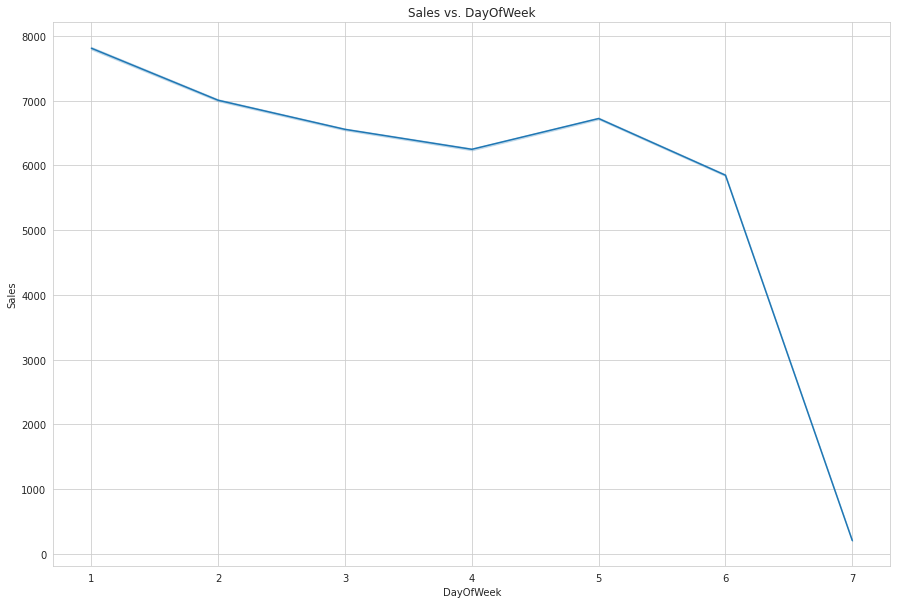

In [184]:
# Chart - # Plot the relationship between Sales and DayOfWeek
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x="DayOfWeek", y="Sales", data=data)
plt.title("Sales vs. DayOfWeek")
plt.show()


##### 1. Why did you pick the specific chart?

DayOfWeek in the Rossman retail sales dataset because it is an effective way to show the trend of sales over time. A line plot can help to identify any patterns or trends in the data and show how sales vary by day of the week.



##### 2. What is/are the insight(s) found from the chart?



*   There is a consistent pattern of higher sales on weekends: The line plot may show that sales are generally higher on Saturdays and Sundays compared to weekdays.

*   Sales peak around the middle of the week: In addition to higher sales on weekends, the line plot may also show a peak in sales around the middle of the week, on Wednesdays or Thursdays. 


*   Sales may be lower on certain weekdays: The line plot may also reveal that sales are consistently lower on certain weekdays, such as Mondays or Tuesdays.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In summary, the insights gained from the line plot can help create a positive business impact, Due to the fact that best 2 days are witnessing properly income, keep can target final 5 days in every week to take advantage of extra sales. It could run interesting gives and attract more customers on weekdays to generate extra revenue.

#### Chart - 8

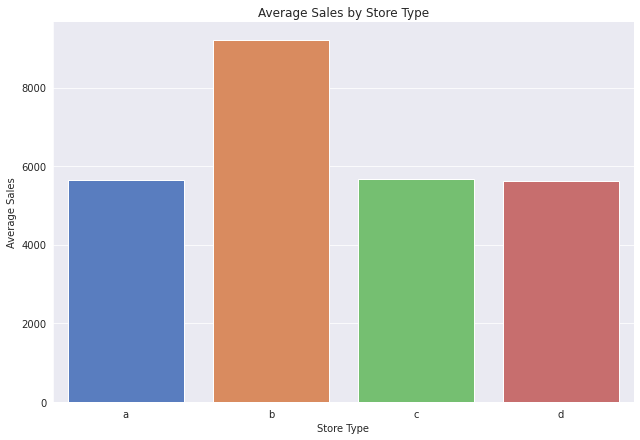

In [307]:
# Chart - the relationship between Sales and StoreType
# Create the grouped bar chart
sales_by_storetype = data.groupby('StoreType')['Sales'].mean().reset_index()
# Create the grouped bar chart
sns.catplot(x='StoreType', y='Sales', kind='bar', data=sales_by_storetype, palette='muted',height=6, aspect=1.5)
# Set the chart title and axis labels
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')

# Show the chart
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart is an effective choice to visualize the relationship between Sales and StoreType because it can provide valuable insights into the performance of different store types in terms of sales, and can help guide retailers in their decision-making processes.

##### 2. What is/are the insight(s) found from the chart?

*    Store type B has the highest average sales compared to the other store types, indicating that it is the most successful store type in terms of sales.

*    Store types A and C have relatively similar average sales, but both have lower average sales compared to Store types B and D.

*    Store type D has the lowest average sales of all store types, indicating that it is the least successful store type in terms of sales.

*    The variation in sales between the different store types is quite significant, with Store type B having almost twice the average sales of Store type D.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the relationship between Sales and StoreType chart can help create a positive business impact for Rossman retail owners.By understanding the sales performance of each store type, Rossman owners can make informed decisions about where to allocate resources, such as staffing, inventory, and marketing, to optimize sales and profit margins

#### Chart - 9

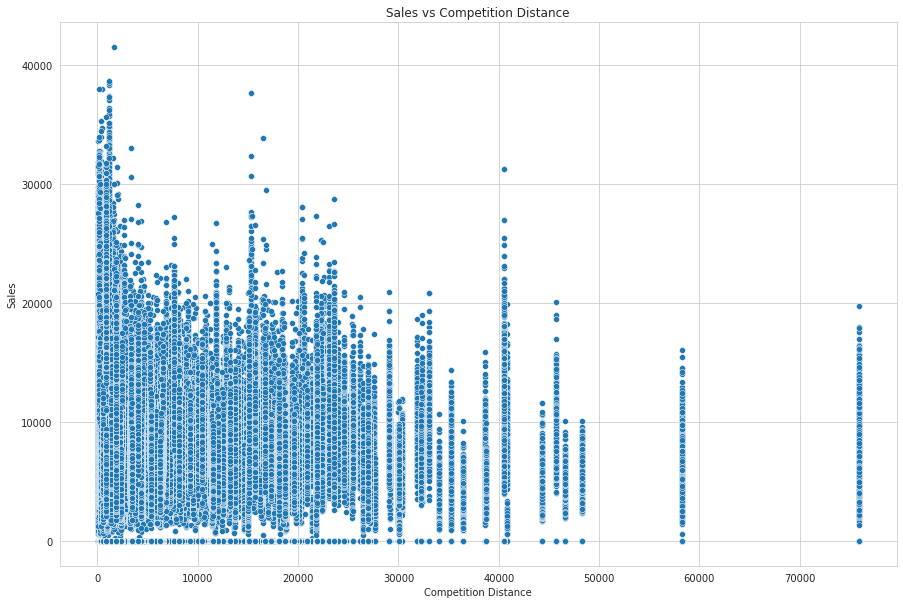

In [186]:
# Chart - the relationship between Sales and CompetitionDistance
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
# Add labels and title
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.title('Sales vs Competition Distance')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a scatter plot to visualize the relationship between Sales and CompetitionDistance in the Rossman retail sales dataset because it is an effective way to display the relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot of Sales vs CompetitionDistance shows that there is a weak negative correlation between the two variables.The scatter plot also shows that there are a few outliers in the data, where some stores have extremely high sales despite having high competition distances, and some stores have low sales despite having low competition distances.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the Sales vs CompetitionDistance scatter plot can potentially create a positive business impact for Rossman retail stores. By identifying stores that are performing well despite high competition distances, the owners can learn from their strategies and apply them to other stores to potentially increase their sales.

#### Chart - 10

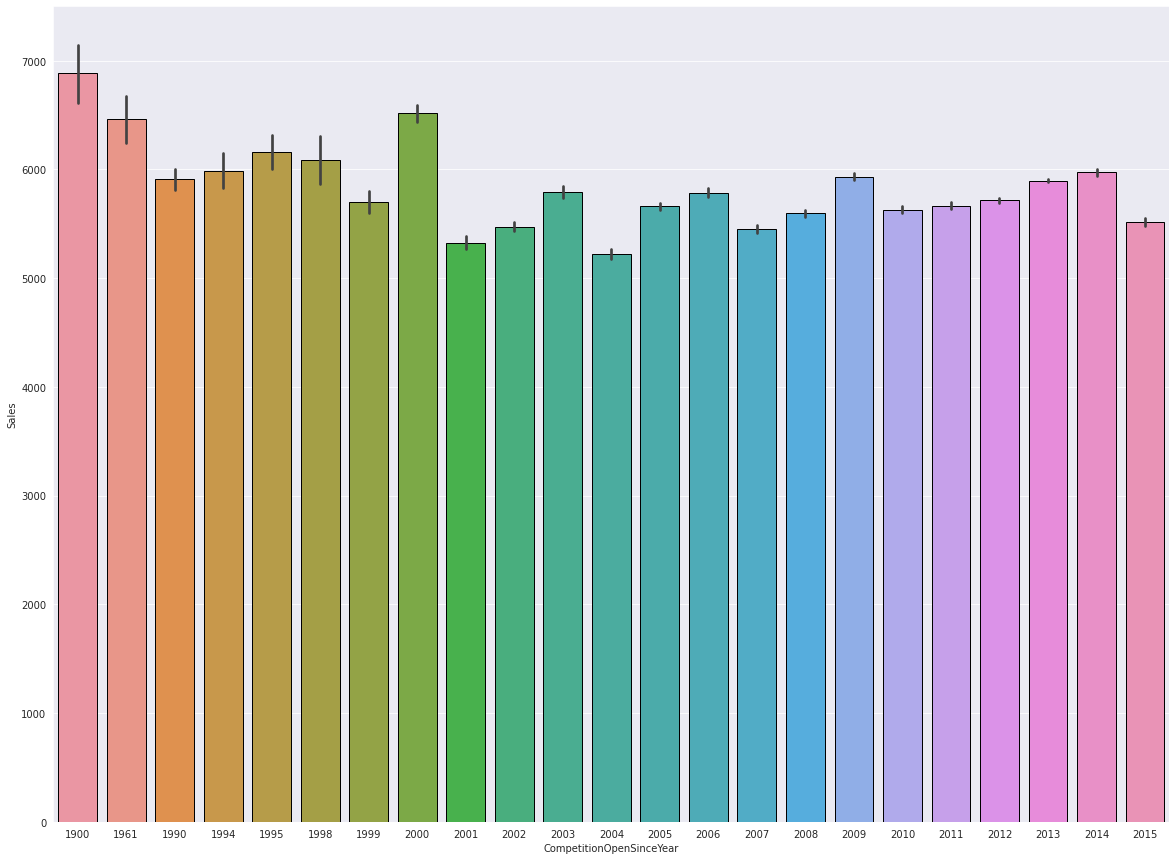

In [187]:
# Chart - the relationship between Sales and CompetitionOpenSinceYear
plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
ax = sns.barplot(x=data['CompetitionOpenSinceYear'],y=data['Sales'],edgecolor='black')

plt.show()

##### 1. Why did you pick the specific chart?

A  plot would show the individual Sales values for each value of CompetitionOpenSinceYear,




##### 2. What is/are the insight(s) found from the chart




From the Plot we are able to tell that sales are excessive at some point of the yr 1900, as there are only a few save had been operated of Rossmann so there is much less opposition and sales are high. However as year skip on variety of shops extended which means competition also extended and this leads to decline within the income.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Considering the fact that almost every next 12 months reports unexpected drop/upward push inside the sales, proprietors want to work on their stockings and advertising methods. The primary cause for this unexpected alternate may be explored extra deeply and a achievable method to it can be reached.

#### Chart - 11

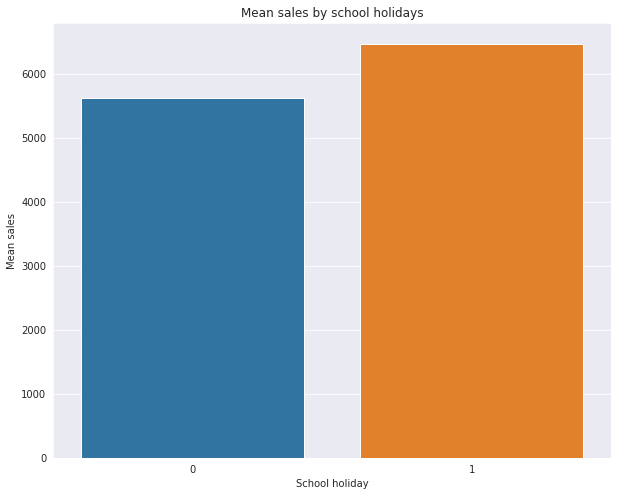

In [188]:
# Chart - the relationship between Sales and SchoolHoliday
# Group the data by school holidays and calculate the mean sales
sales_by_school_holiday = data.groupby("SchoolHoliday")["Sales"].mean()

# Plot the mean sales by school holidays using a bar plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=sales_by_school_holiday.index, y=sales_by_school_holiday.values)
plt.xlabel("School holiday")
plt.ylabel("Mean sales")
plt.title("Mean sales by school holidays")
plt.show()


##### 1. Why did you pick the specific chart?

 It's particularly useful when we want to compare the average values of a variable across different groups or categories.

##### 2. What is/are the insight(s) found from the chart?

Sales tend to be higher during non-School Holiday periods compared to School Holidays, indicating that School Holidays may have a negative impact on sales.

The difference in Sales between School Holidays and non-School Holidays may vary depending on the specific School Holiday period. 

Sales during non-School Holiday periods may be more stable and predictable compared to School Holidays, which may experience fluctuations in demand due to factors such as travel and leisure activities.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the relationship between sales and school holidays can certainly help in creating a positive business impact. If we find that sales are significantly higher on school holidays than on non-school holidays, a business can plan its promotions and advertising campaigns accordingly to capitalize on this trend. 

#### Chart - 12

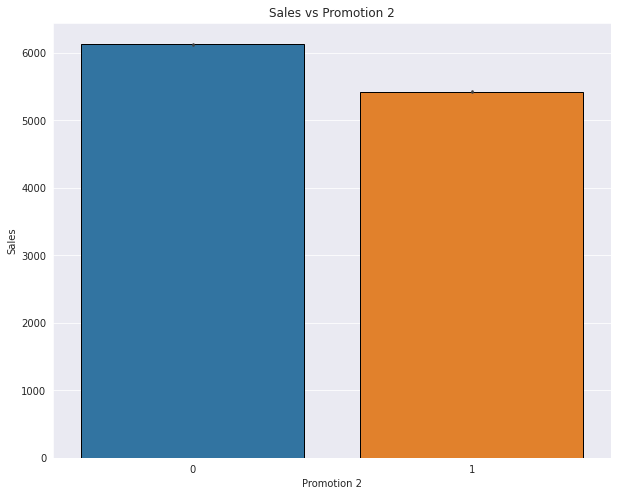

In [189]:
# Chart - Boar plot of Sales vs Promo2
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=data['Promo2'],y=data['Sales'],edgecolor='black')
plt.xlabel("Promotion 2")
plt.ylabel("Sales")
plt.title("Sales vs Promotion 2")
plt.show()

##### 1. Why did you pick the specific chart?

his plot can help you identify any differences in the average sales for stores with and without Promo2. It can also help you determine the effectiveness of the Promo2 program and whether it has a significant impact on sales.

##### 2. What is/are the insight(s) found from the chart?

The bar plot comparing the average sales by Promo2 shows that stores with Promo2 have slightly higher average sales than stores without Promo2. This suggests that Promo2 has a positive impact on sales, but the difference in sales may not be significant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

he insight gained from the chart that participating in Promo2 can have a positive impact on sales can potentially lead to a positive business impact.There are no insights from the chart that suggest negative growth. However, it is possible that running a poorly planned or executed Promo2 program can lead to negative growth. 

#### Chart - 13

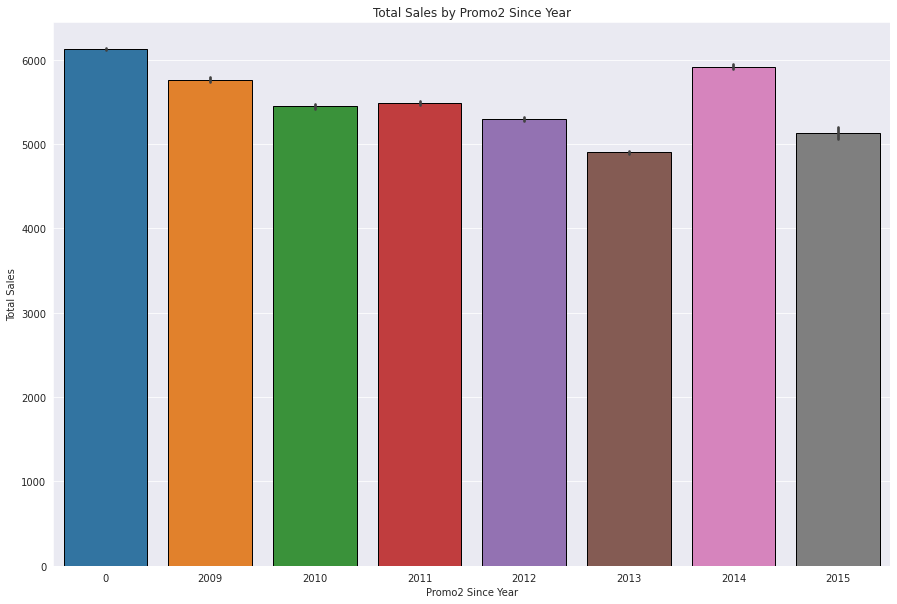

In [190]:
#chart - Barplot for Sales vs Promo2sinceYear
fig, ax = plt.subplots(figsize=(15, 10))
plots=sns.barplot(x=data['Promo2SinceYear'],y=data['Sales'],edgecolor='black')
plt.xlabel("Promo2 Since Year")
plt.ylabel("Total Sales")
plt.title("Total Sales by Promo2 Since Year")
plt.show()

#####1.Why did you pick the specific chart?

In this plot, we are showing the distribution of Sales for each Promo2SinceYear value. The bar  indicates the density of Sales values for that Promo2SinceYear value.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be found from the Sales vs Promo2SinceYear chart 

*   This barplot explains that sales had been nonetheless the best when the shop wasn't walking any consecutive promotional events. However in 2014, the sales were clearly shoot up and they're recorded as second highest. Correct nice merchandise, higher deals, shutdown of competitions and so forth may be the reasons.



#####Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights are certainly helpful as they may be highlighting one of the most vital aspect about consecutive promotions. Sincerely, such promotions aren't enough to convert customers into shoppers. The store wishes to come up with more modern and more rewardful solutions.

####  Chart - 14 

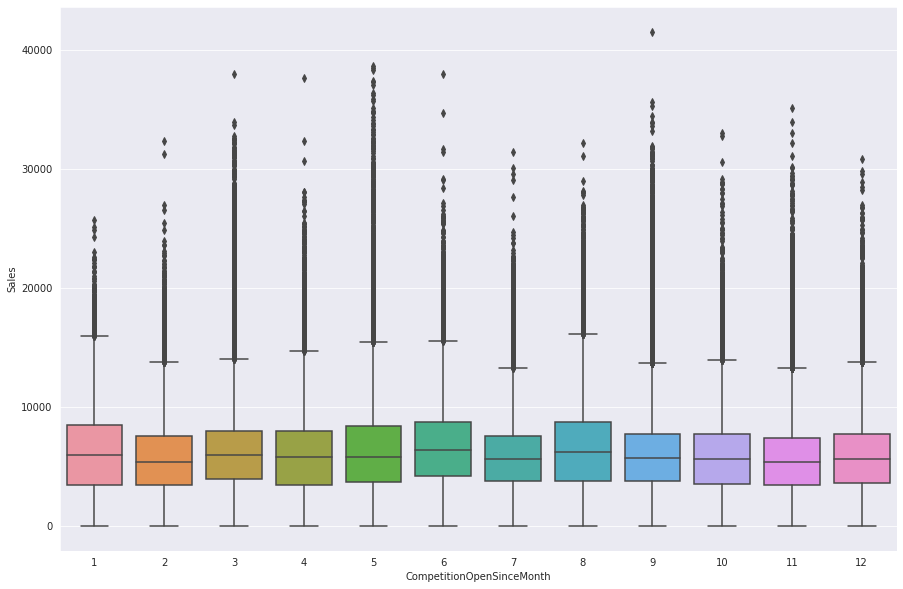

In [191]:
# Chart - #box plot for Sales" and "CompetitionOpenSinceMonth"
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, x='CompetitionOpenSinceMonth', y='Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Box plots can help us identify the median and quartiles of the data, as well as any outliers. A box plot can help us see how sales have changed over time and how the distribution of sales has varied between different months

##### 2. What is/are the insight(s) found from the chart?

 The insights that could be gained from examining the relationship between "Sales" and "CompetitionOpenSinceMonth"

*   The moths of  January, February, and June all have relatively low medians, suggesting that these months may be more challenging for existing stores when facing new competition

*   On the other hand, the boxes for April and November have higher medians, suggesting that existing stores may be more resilient to new competition during these months. 


*   Additionally, there are some outliers in the data, such as the high sales values in September, that may be worth investigating further to understand what factors contributed to those sales.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the relationship between "Sales" and "CompetitionOpenSinceMonth" could potentially help create a positive business impact, it's important to approach these insights with a critical and strategic mindset and to consider the broader context of the business when making decisions.

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

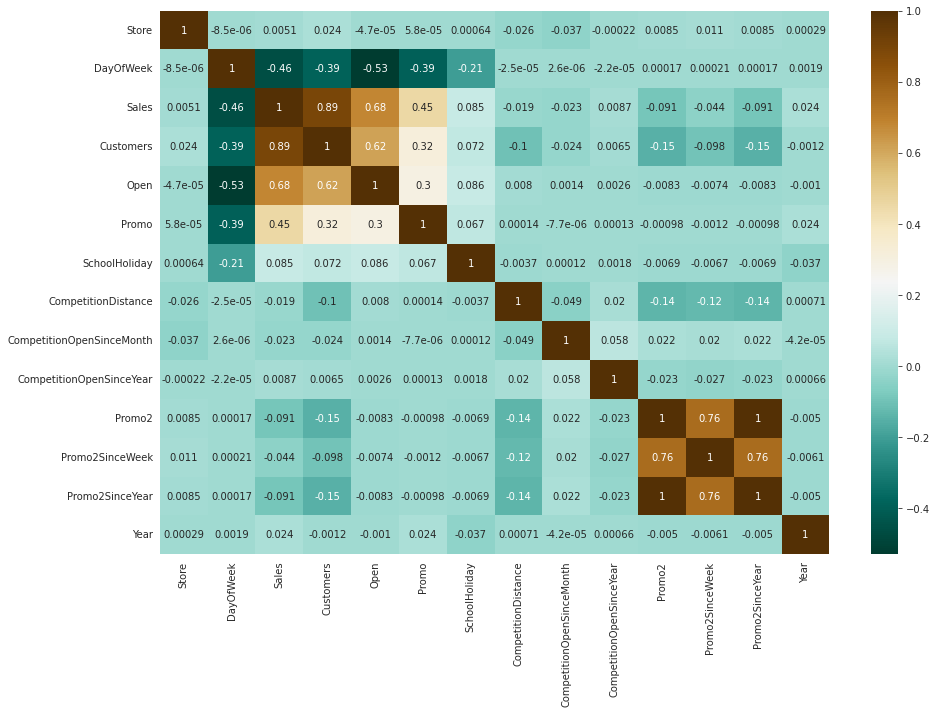

In [194]:
# Correlation Heatmap visualization code
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True ,cmap='BrBG_r')

##### 1. Why did you pick the specific chart?

Heat maps are a good choice when you want to visualize the correlations between multiple variables in a dataset. They use color to represent the magnitude of the values in a matrix, making it easy to identify strong positive or negative correlations between pairs of variables.

##### 2. What is/are the insight(s) found from the chart?

*   Sales are strongly correlated with the number of customers in the store (correlation coefficient of 0.89), indicating that stores with more customers tend to have higher sales.

*   Sales are weakly correlated with the competition distance (correlation coefficient of -0.03), indicating that the distance to the nearest competitor has little effect on sales.

*   Sales are moderately correlated with whether or not a store is running a promotion (correlation coefficient of 0.38), indicating that promotional activities can have a positive effect on sales.

*   The number of customers in the store is weakly correlated with the competition distance (correlation coefficient of -0.15), indicating that the distance to the nearest competitor may affect customer behavior to some extent.

*   The number of customers in the store is also weakly correlated with whether or not a store is running a promotion (correlation coefficient of 0.32), indicating that promotions may be one factor that affects customer behavior.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the heatmap can help create a positive business impact if they are used to guide informed decision-making and optimization of business processes. 

However, some insights from the heatmap may lead to negative growth if they are not properly understood and managed

Overall, the insights gained from the heatmap are valuable for understanding the relationships between variables in the Rossmann retail dataset, but they need to be interpreted and used carefully to ensure positive business outcomes.

#### Chart - 15 - Pair Plot 

Since the pair plot for all the columns is taking more time so i had taken the columns which highly corelated with sales and plotting pair plot

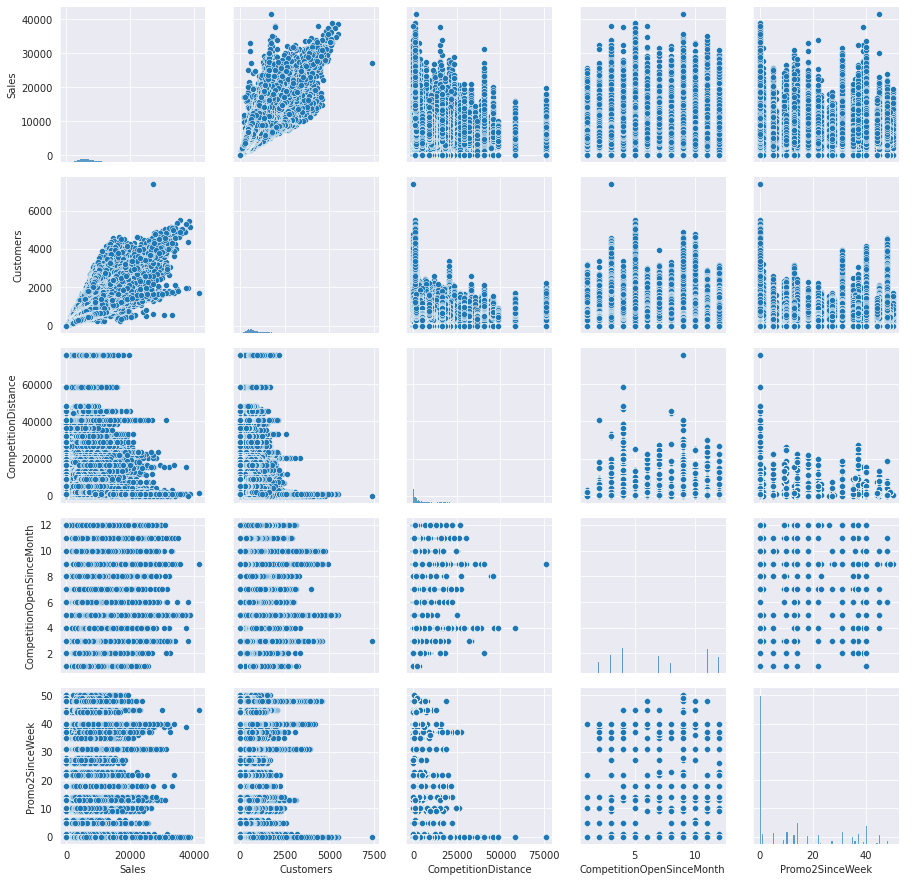

In [195]:

# Select the top 5columns that are correlated with Sales
g = sns.PairGrid(data[['Sales','Customers','CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
     

##### 1. Why did you pick the specific chart?

A pair plot is a useful type of graph for exploring relationships between multiple variables in a dataset. It displays scatter plots of all possible pairs of variables along the diagonal and histograms of each variable on the diagonal. This can help identify interesting patterns or trends in the data and may be useful for feature selection or building predictive models

##### 2. What is/are the insight(s) found from the chart?

Pairplot helped us to visualize the relationship between income and other variables, which include clients, Promotions, opposition, and college vacations Columns. This helped us to discover which variables might be useful for predicting income and tell the design for our system gaining knowledge of version.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Statement - 1**

Null Hypothesis (H0): There is no correlation between the sales and customers.

Alternative Hypothesis (Ha): There is a significant correlation between the two variables

**Statement - 2**

Null hypothesis (H0): There is no correlation between Sales and School Holiday

Alternative hypothesis (Ha): There is a signifance correlation between Sales and School Holiday.

**Statement - 3**

Null Hypothesis (H0): There is no difference in sales between stores with and without a promotion on a given day.

Alternative Hypothesis (Ha): Stores with promotions have higher sales than stores without promotions on a given day.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no correlation between the sales and customers.

Alternative Hypothesis:  There is a significant correlation between the two variables

#### 2. Perform an appropriate statistical test.

In [196]:
from scipy.stats import pearsonr

# Extract sales and customer data
customers = data['Customers']
sales = data['Sales']

# Conduct correlation test
corr, p_val = pearsonr(customers,sales)

# Print correlation coefficient and p-value
print('Correlation Coefficient:', corr)
print('P-Value:', p_val)
alpha=0.05
if p_val> alpha:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')



Correlation Coefficient: 0.8947107733017132
P-Value: 0.0
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I had used  Pearson correlation test,as it can be used to determine the relationship between two variables, such as sales and the number of customers

##### Why did you choose the specific statistical test?

Correlation tests are used to measure the strength and direction of the linear relationship between two variables. In the case of the Rossman retail dataset, it can be useful to use correlation tests to see if there is a relationship between customer and sales. 

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no difference in sales between stores with and without a promotion on a given day.

Alternative Hypothesis: Stores with promotions have higher sales than stores without promotions on a given day.

#### 2. Perform an appropriate statistical test.

In [197]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Extract sales data for stores with and without promotions
sales_with_promo = data[data['Promo'] == 1]['Sales']
sales_without_promo = data[data['Promo'] == 0]['Sales']

# Conduct t-test
t_stat, p_val = ttest_ind(sales_with_promo, sales_without_promo)
print('P-Value:', p_val)
alpha=0.05
if p_val> alpha:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

P-Value: 0.0
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I had use a two-sample t-test can be used to test the difference in sales between stores with and without promotions

##### Why did you choose the specific statistical test?

A two-sample test is used when we want to compare the means of two independent groups. In the case of the Rossman retail dataset, a two-sample t-test can be used to compare the mean sales of stores with and without promotions. By performing this test, we can determine if there is a significant difference in sales between the two groups and make informed decisions regarding the effectiveness of promotions in increasing sales.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no correlation between Sales and School Holiday

Alternative hypothesis (Ha): There is a correlation between Sales and School Holiday.

#### 2. Perform an appropriate statistical test.

In [198]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Extract sales and customer data
SchoolHoliday = data['SchoolHoliday']
sales = data['Sales']

# Conduct correlation test
corr, p_val = pearsonr(sales, SchoolHoliday)

# Print correlation coefficient and p-value
print('P-Value:', p_val)

alpha=0.05
if p_val> alpha:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

P-Value: 0.0
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I had used Pearson correlation test,as it can be used to determine the relationship between two variables, such as sales and the number of customers

##### Why did you choose the specific statistical test?

Correlation tests are used to degree the power and route of the linear relationship among two variables. Within the case of the Rossman retail dataset, it may be useful to use correlation checks to peer if there's a dating between patron and income.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [199]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum().sort_values(ascending=False)

Store                        0
Assortment                   0
PromoInterval                0
Promo2SinceYear              0
Promo2SinceWeek              0
Promo2                       0
CompetitionOpenSinceYear     0
CompetitionOpenSinceMonth    0
CompetitionDistance          0
StoreType                    0
DayOfWeek                    0
SchoolHoliday                0
StateHoliday                 0
Promo                        0
Open                         0
Customers                    0
Sales                        0
Date                         0
Year                         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I had devide my null value columns into 3 parts 

The first part is replaced with 0.

The second part is replaced with mode.

The third part was replaced with meadian.

### 2. Handling Outliers

a) For Continous Variables 

Outlier Detection


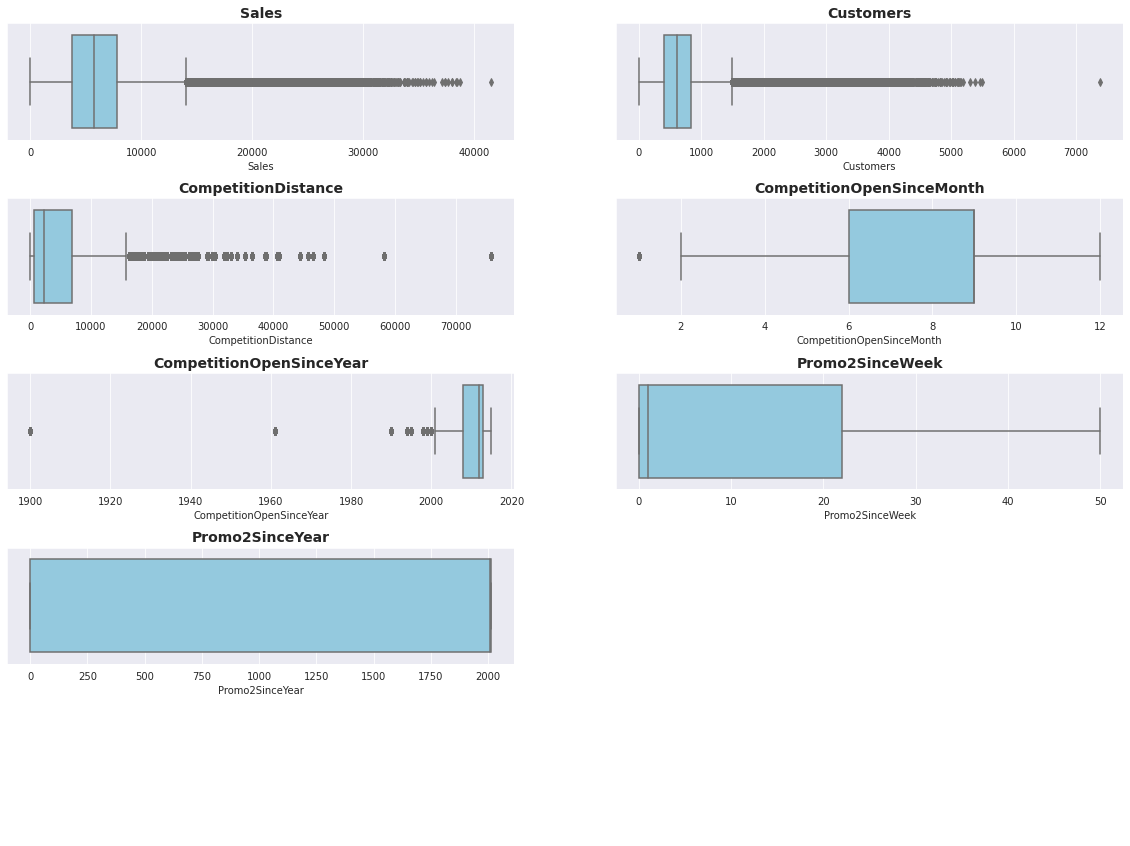

In [200]:
# Define continuous variables to plot in box plots
continuous_vars = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                   'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 15))
ax = axes.ravel()

# Create box plots for each variable
for i, column in enumerate(continuous_vars):
    sns.boxplot(x=data[column], ax=ax[i], color='skyblue')
    ax[i].set_title(column, fontsize=14, weight='bold')

# Hide unused subplots
for i in range(len(continuous_vars), len(ax)):
    ax[i].axis('off')

# Adjust spacing and display plot
fig.subplots_adjust(hspace=0.5)
plt.show()



##### There are lots of outlier in our dataset, we need to remove them before we train our model.Outliers can have a significant impact on statistical analyses and machine learning models. If left untreated, outliers can distort the overall distribution of a dataset and cause inaccurate estimates of statistical measures such as the mean, median, and standard deviation. 


In [201]:
# Select the continuous variables
continuous_vars = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                   'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

# Define the detect_outliers_iqr function
def detect_outliers_iqr(data, columns):
    outlier_masks = {}
    outlier_percentages = {}
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
        outlier_masks[column] = outlier_mask
        outlier_percentages[column] = outlier_mask.mean() * 100
    return outlier_masks, outlier_percentages

# Detect outliers using the IQR method
outlier_masks, outlier_percentages = detect_outliers_iqr(data, continuous_vars)

# Print the outlier percentages
print("Outlier percentages:")
for column, percentage in outlier_percentages.items():
    print(f"{column}: {percentage:.2f}%")


Outlier percentages:
Sales: 2.62%
Customers: 3.75%
CompetitionDistance: 9.75%
CompetitionOpenSinceMonth: 1.22%
CompetitionOpenSinceYear: 2.71%
Promo2SinceWeek: 0.00%
Promo2SinceYear: 0.00%


###**INFERENCE**

From above outlier detection test we got Outlier percentages: 

Sales: 2.62%

Customers: 3.75%

CompetitionDistance: 9.75%

CompetitionOpenSinceMonth: 1.22%

CompetitionOpenSinceYear: 2.71%

Promo2SinceWeek: 0.00%

Promo2SinceYear: 0.00%

### Outlier Treatment

In [202]:

# function to remove outliers using IQR
def remove_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = np.where(column > upper_bound, upper_bound, column)
    column = np.where(column < lower_bound, lower_bound, column)
    return column

# function to remove outliers using z-score
def remove_outliers_zscore(column):
    z_scores = (column - column.mean()) / column.std()
    abs_z_scores = np.abs(z_scores)
    column = column[abs_z_scores < 3]
    return column

# list of continuous variables
continuous_vars = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                   'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

# removing outliers using IQR
for column in continuous_vars:
    data[column] = remove_outliers_iqr(data[column])

# removing outliers using z-score
for column in continuous_vars:
    data[column] = remove_outliers_zscore(data[column])

# checking the number and percentage of remaining outliers using z-score
for column in continuous_vars:
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    abs_z_scores = np.abs(z_scores)
    outliers = data[column][abs_z_scores > 3]
    outlier_percentage = len(outliers) / len(data[column]) * 100
    print(f"Number of outliers in {column}: {len(outliers)} ({outlier_percentage:.2f}%)")


Number of outliers in Sales: 0 (0.00%)
Number of outliers in Customers: 0 (0.00%)
Number of outliers in CompetitionDistance: 0 (0.00%)
Number of outliers in CompetitionOpenSinceMonth: 0 (0.00%)
Number of outliers in CompetitionOpenSinceYear: 0 (0.00%)
Number of outliers in Promo2SinceWeek: 0 (0.00%)
Number of outliers in Promo2SinceYear: 0 (0.00%)


**So we have no oulier left with our datset**

##### What all outlier treatment techniques have you used and why did you use those techniques?

I had used both IQR and z-score methods which  are commonly used and have their own advantages and disadvantages.

* IQR method is robust to outliers and works well when the data is not normally distributed or contains extreme values. However, it may remove valid data points that are outside of the outlier range.

* Z-score method assumes the data is normally distributed and can identify outliers more accurately than IQR for normally distributed data. However, it may not work well if the data is not normally distributed.

* Therefore i had used both the method

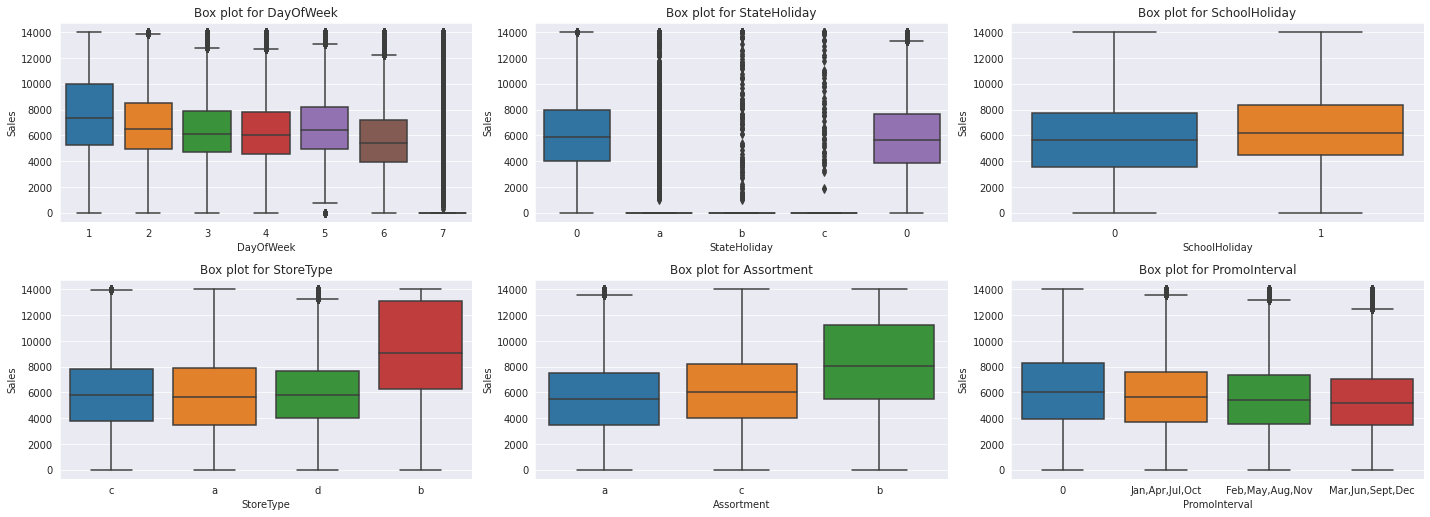

In [203]:
# create a list of all categorical columns
cat_cols = ['DayOfWeek','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'PromoInterval']

plt.figure(figsize=(20, 14))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=col, y='Sales', data=data)
    plt.title(f"Box plot for {col}")
plt.tight_layout()
plt.show()


### 3. Categorical Encoding

In [204]:
# Encode your categorical columns
# checking the catagorical attributes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  float64       
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

Clearly we have "StoreType", "Assortment", "PromoInterval" as "object".There are different types of categorical encoding techniques such as Label Encoding, One-Hot Encoding, Binary Encoding, etc

In [205]:
#check the type of unique value in catagorical variables
# create a list of categorical columns
cat_cols = ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]
# Looping through all columns of object type
for col in data.select_dtypes(include='object').columns:
    
    # Printing unique values and its count
    print(f"Unique values for column '{col}' are: \n{data[col].unique()}\n")
    print(f"Number of unique values for column '{col}' are: {data[col].nunique()}\n")



Unique values for column 'StateHoliday' are: 
['0' 'a' 'b' 'c' 0]

Number of unique values for column 'StateHoliday' are: 5

Unique values for column 'StoreType' are: 
['c' 'a' 'd' 'b']

Number of unique values for column 'StoreType' are: 4

Unique values for column 'Assortment' are: 
['a' 'c' 'b']

Number of unique values for column 'Assortment' are: 3

Unique values for column 'PromoInterval' are: 
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']

Number of unique values for column 'PromoInterval' are: 4



In [206]:
data["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1},inplace=True)

In [207]:
for unique in cat_cols:
  print(f"{unique}: ")
  print(f"The unique values are: {data[unique].unique()}")
  print(f"Total number of unique values are: {data[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




In [208]:
#Lets create a copy of dataframe
data_new=data.copy() 

In [209]:
# Encode your categorical columns by dropping the first category
data_new= pd.get_dummies(data, dtype=int, drop_first=True)           #we are dropiing first to get out of dummy variable trap

In [210]:
# Let's see first five observations of our dataset
data_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Promo2SinceYear,Year,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020.0,546.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782.0,523.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011.0,560.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0
4,1,1,2015-07-27,6102.0,612.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0


In [211]:
# re checking that everythin looks fine
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  float64       
 4   Customers                       1017209 non-null  float64       
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  float64       
 10  CompetitionOpenSinceMonth       1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

*  We've used one-Hot encoding technique to trade our specific capabilities of object type into int type with the aid of creating their dummies so that it becomes well suited to feed it into diverse ML algorithms in future.

* Due to the fact, we have three to four precise orderless categories in all the express functions (which is less in range). So, it is ideal to use Nominal encoding approach than ordinal.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [212]:
# Expand Contraction
## We don't have textual data in any of the feature so it is not needed for our project

#### 2. Lower Casing

In [213]:
# Lower Casing
## We don't have Lower Casing in any of the feature so it is not needed for our project

#### 3. Removing Punctuations

In [214]:
# Remove Punctuations
##Not needed

#### 4. Removing URLs & Removing words and digits contain digits.

In [215]:
# Remove URLs & Remove words and digits contain digits
## not needed

#### 5. Removing Stopwords & Removing White spaces

In [216]:
# Remove Stopwords
##no needed

In [217]:
# Remove White spaces
#Not needed

#### 6. Rephrase Text

In [218]:
# Rephrase Text
#not needed

#### 7. Tokenization

In [219]:
# Tokenization
## not needeed

#### 8. Text Normalization

In [220]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
##no neede

##### Which text normalization technique have you used and why?

## We don't have textual data in any of the feature so it is not needed for our project

#### 9. Part of speech tagging

In [221]:
# POS Taging
#Not needed

#### 10. Text Vectorization

In [222]:
# Vectorizing 
## Not neede

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [223]:
# Manipulate Features to minimize feature correlation and create new features
data_new.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Promo2SinceYear,Year,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0
1,1,4,2015-07-30,5020.0,546.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0
2,1,3,2015-07-29,4782.0,523.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0
3,1,2,2015-07-28,5011.0,560.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0
4,1,1,2015-07-27,6102.0,612.0,1,1,0,1,1270.0,...,0.0,2015,0,1,0,0,0,0,0,0


In [224]:
#In feature manupulation we can extract day date year from date columns.
# Extracting date, month and year from Date feature
data_new["Day"]= data_new["Date"].dt.day
data_new["Month"]= data_new["Date"].dt.month
data_new["Year"]= data_new["Date"].dt.year

In [225]:
# Dropping the observations where the stores are closed and Sales are 0.
data_new = data_new.drop(data_new[((data_new.Open == 0) | (data_new.Sales == 0))].index)

In [226]:
# Dropping "Open" from our dataset
data_new.drop(columns=["Open"], inplace=True)

In [227]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844338 non-null  int64         
 1   DayOfWeek                       844338 non-null  int64         
 2   Date                            844338 non-null  datetime64[ns]
 3   Sales                           844338 non-null  float64       
 4   Customers                       844338 non-null  float64       
 5   Promo                           844338 non-null  int64         
 6   StateHoliday                    844338 non-null  int64         
 7   SchoolHoliday                   844338 non-null  int64         
 8   CompetitionDistance             844338 non-null  float64       
 9   CompetitionOpenSinceMonth       844338 non-null  float64       
 10  CompetitionOpenSinceYear        844338 non-null  float6

#### 2. Feature Selection

Correlation analysis: the correlation between each feature and the target variable (Sales) and select the features with the highest correlation coefficients. 

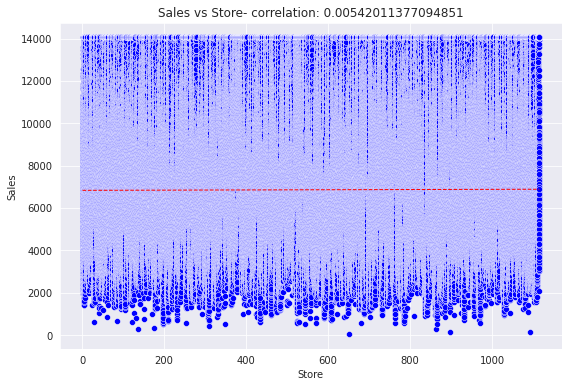

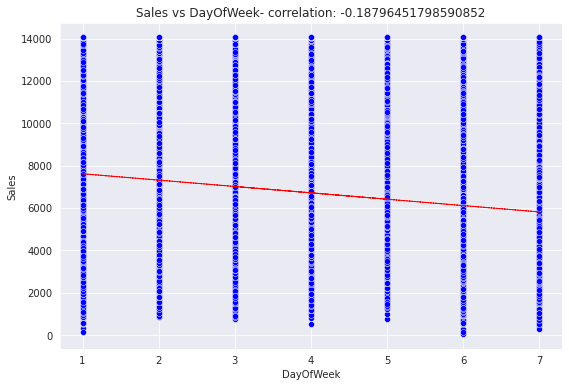

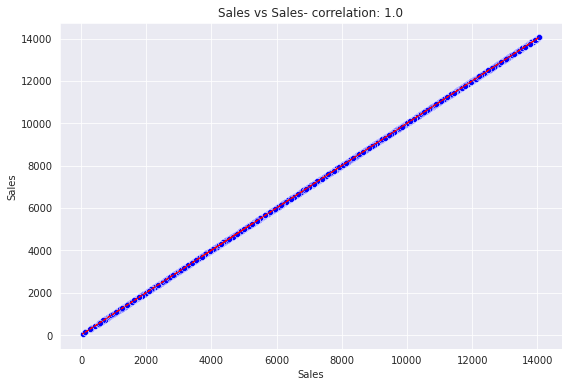

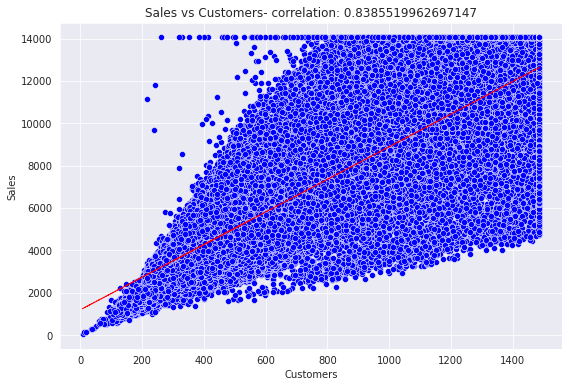

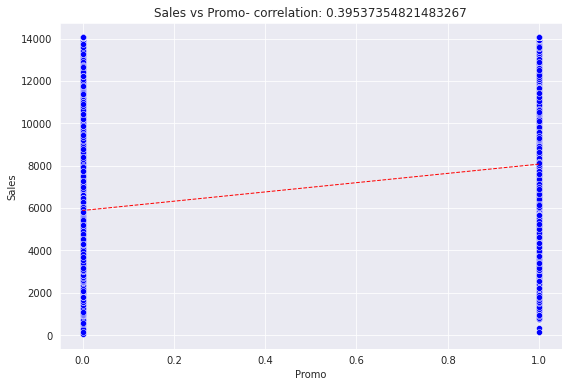

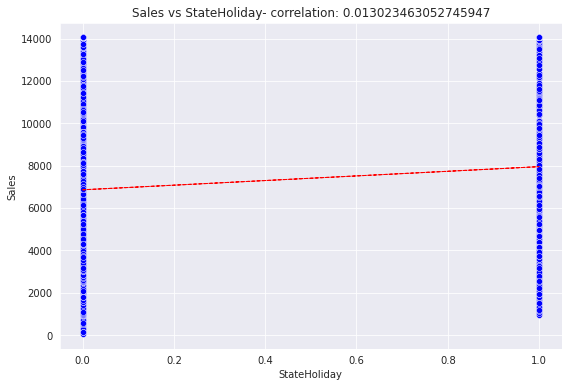

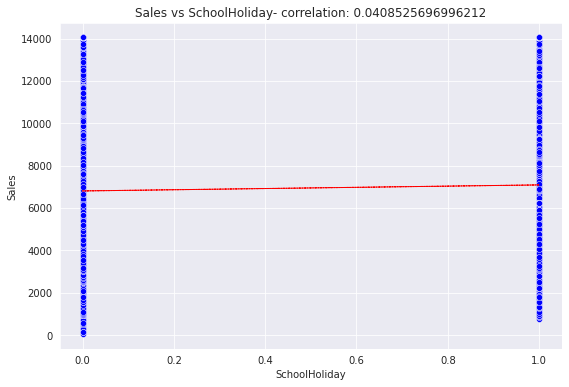

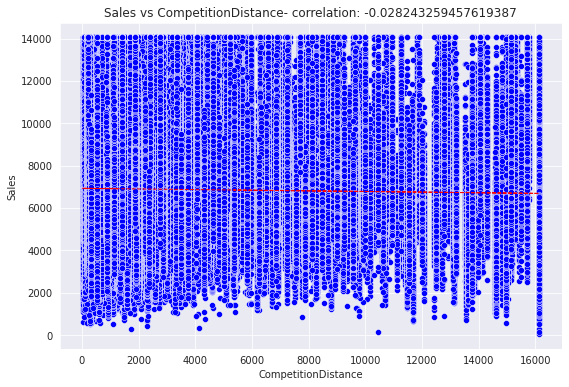

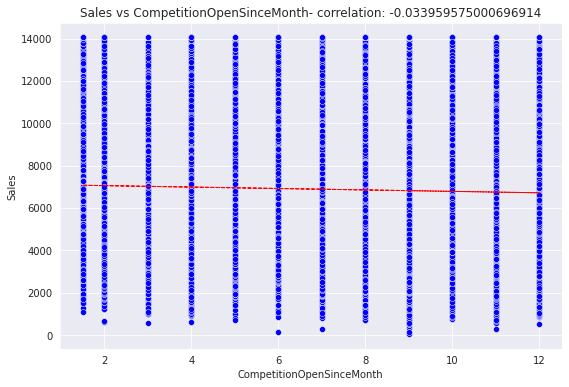

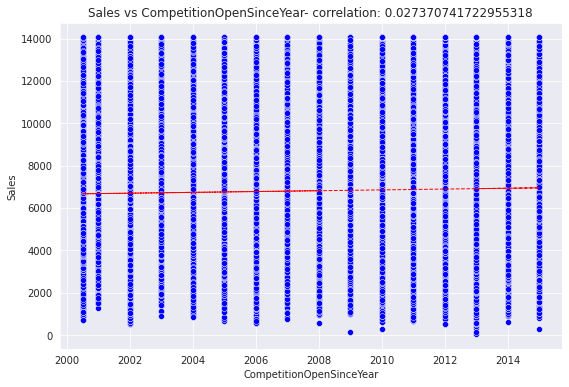

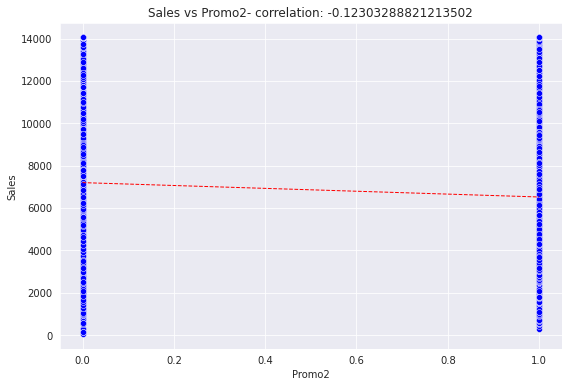

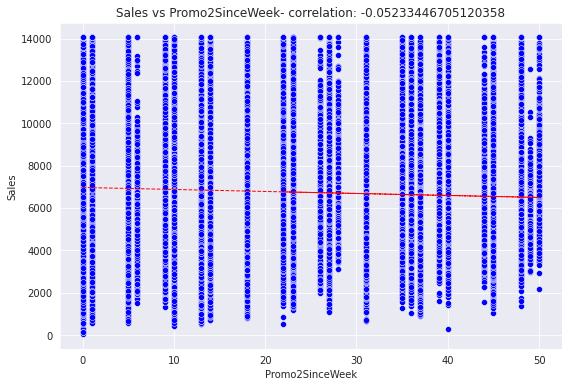

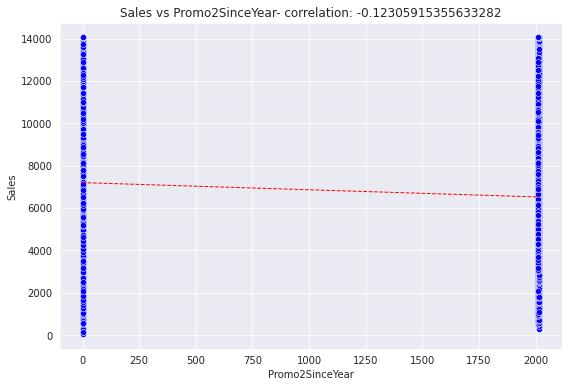

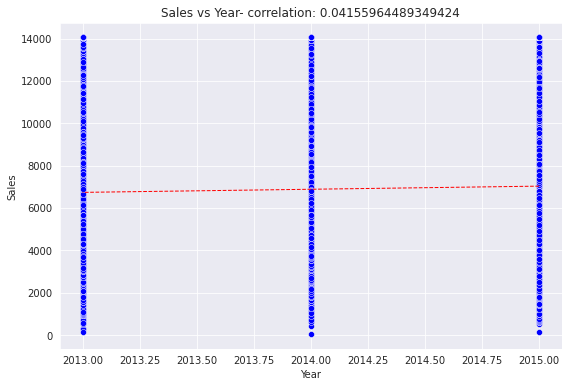

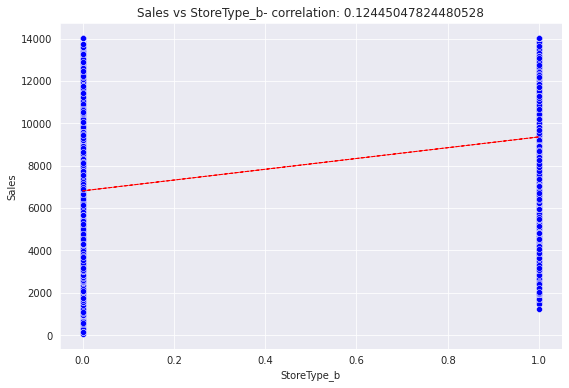

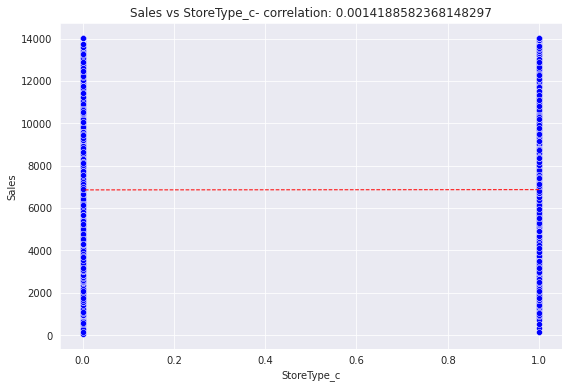

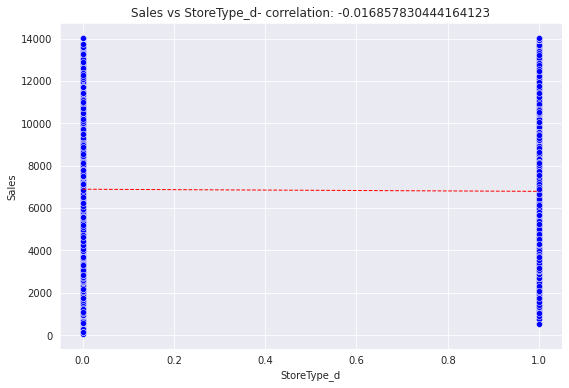

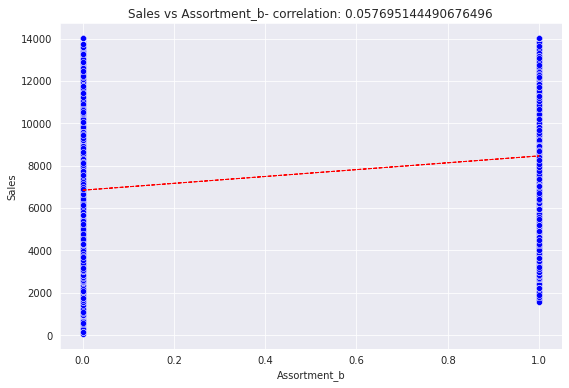

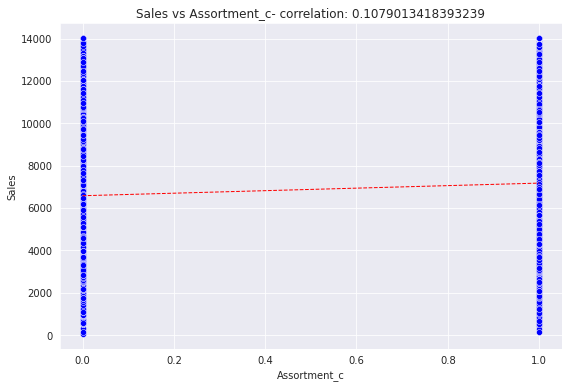

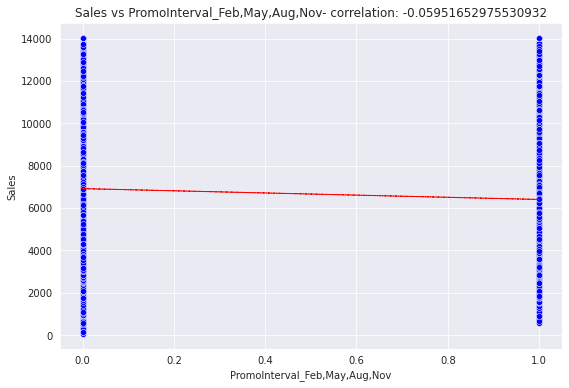

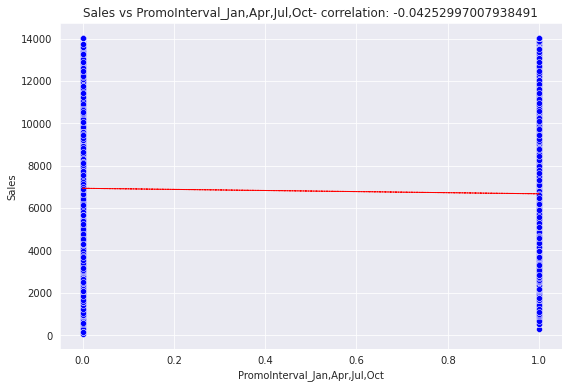

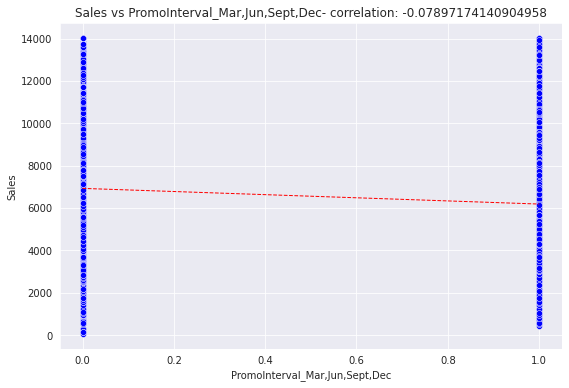

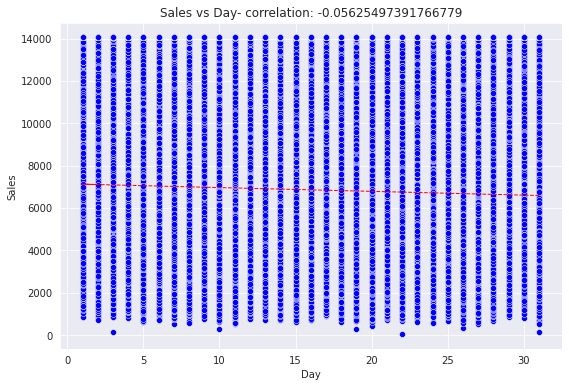

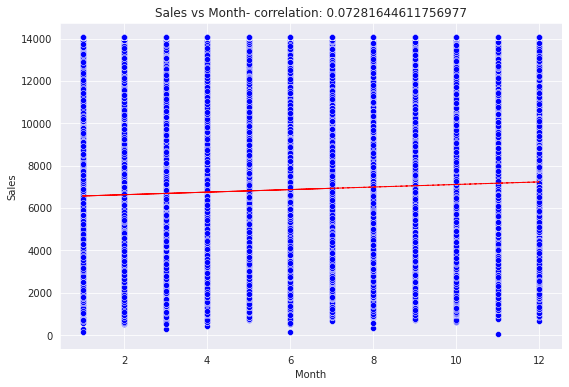

In [228]:
# Loop through the numerical columns in the DataFrame
for col in data_new.describe().columns.tolist():
    # Calculate the correlation between the feature and the target variable
    correlation = data_new[col].corr(data_new['Sales'])
    
    # Create a scatter plot of the feature against the target variable
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.scatterplot(x=col, y='Sales', data=data_new, color='blue')
    ax.set_xlabel(col)
    ax.set_ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    
    # Add a regression line to the plot
    z = np.polyfit(data_new[col], data_new['Sales'], 1)
    y_hat = np.poly1d(z)(data_new[col])
    plt.plot(data_new[col], y_hat, "r--", lw=1)
    
    plt.show()


Text(0.5, 1.0, 'Correlation of the Columns')

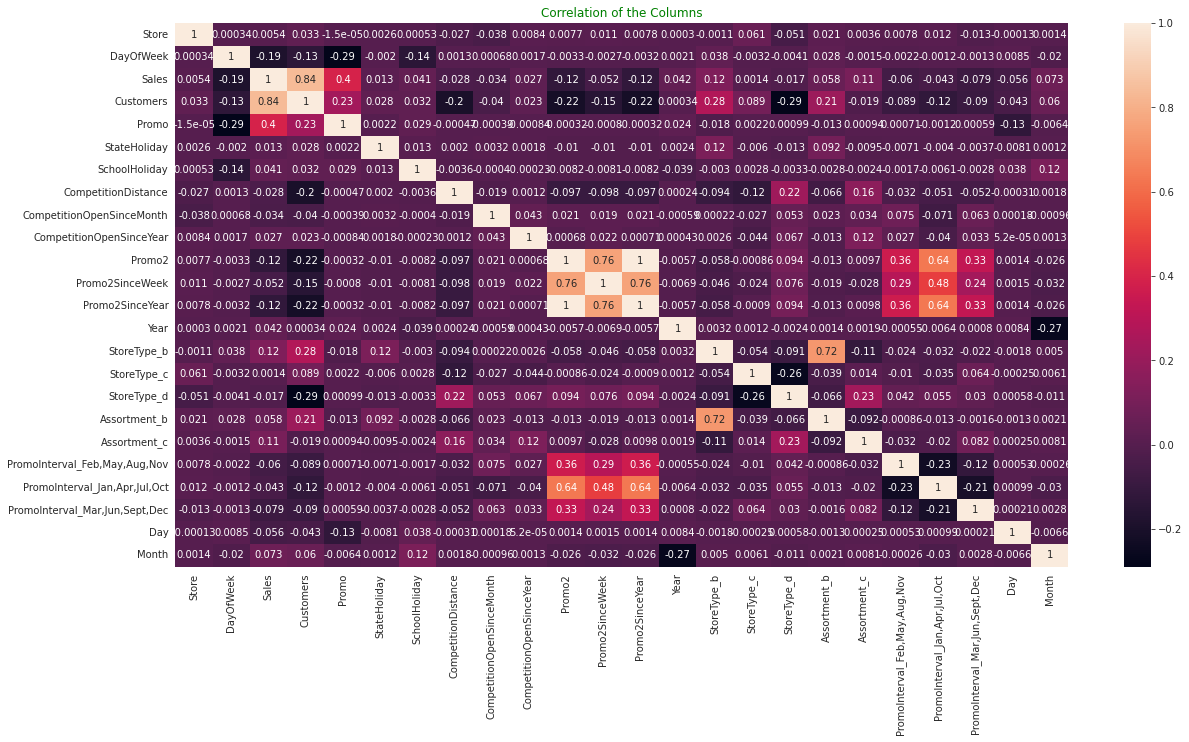

In [273]:
# Select your features wisely to avoid overfitting
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data_new.corr(),annot=True)
plt.title("Correlation of the Columns",color='green')


Let's consist of only the ones functions in our very last dataframe which might be rather impacting on the dependent variable i.e sales. For this we are using Variance Inflation thing technique to determine multicolinearity.There are Lots of columns which can overfitt our model so lets check and remove them

In [ ]:
from numpy.core import machar
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Create a new DataFrame to store the VIF values
    vif = pd.DataFrame(columns=['variables', 'VIF'])

    # Calculate VIF for each feature
    for i in range(X.shape[1]):
        vif.loc[i] = [X.columns[i], variance_inflation_factor(X.values, i)]

    return vif



Calculating the vif for the variables except 
* Sales because its an target variable.

* Store as it is not indicating anything

* Open as it habeen removed from dataset.

* Month & Year as they have been extracted from date column.

In [294]:
calc_vif(data_new[[i for i in data_new.describe().columns if i not in ["Store", "Sales","open"]]])

,variables,VIF
0,DayOfWeek,5.806719e+00
1,Customers,9.758371e+00
2,Promo,2.119306e+00
3,StateHoliday,1.015563e+00
4,SchoolHoliday,1.284663e+00
5,CompetitionDistance,2.052952e+00
6,CompetitionOpenSinceMonth,9.145767e+00
7,CompetitionOpenSinceYear,2.659826e+05
8,Promo2,inf
9,Promo2SinceWeek,4.004973e+00


In [295]:
calc_vif(data_new[[i for i in data_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear","Year","Month","Week"]]])

,variables,VIF
0,DayOfWeek,4.053343
1,Customers,5.658914
2,Promo,2.036122
3,StateHoliday,1.015462
4,SchoolHoliday,1.244615
5,CompetitionDistance,1.874486
6,Promo2,inf
7,StoreType_b,2.245743
8,StoreType_c,1.256111
9,StoreType_d,1.730891


In [296]:
# calculating the vif by excluding some features
calc_vif(data_new[[i for i in data_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month","Week", "Year", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b","PromoDuration"]]])

,variables,VIF
0,DayOfWeek,4.052404
1,Customers,5.656494
2,Promo,2.035734
3,StateHoliday,1.015317
4,SchoolHoliday,1.244582
5,CompetitionDistance,1.874334
6,Promo2,2.625030
7,StoreType_b,1.140325
8,StoreType_c,1.256098
9,StoreType_d,1.730891


In [297]:
# New Dataframe which will be our final dataframe
final_df = data_new[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","Sales"]]

In [298]:
#know your final datset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DayOfWeek                       844338 non-null  int64  
 1   Customers                       844338 non-null  float64
 2   Promo                           844338 non-null  int64  
 3   StateHoliday                    844338 non-null  int64  
 4   SchoolHoliday                   844338 non-null  int64  
 5   CompetitionDistance             844338 non-null  float64
 6   Promo2                          844338 non-null  int64  
 7   StoreType_b                     844338 non-null  int64  
 8   StoreType_c                     844338 non-null  int64  
 9   StoreType_d                     844338 non-null  int64  
 10  Assortment_c                    844338 non-null  int64  
 11  PromoInterval_Feb,May,Aug,Nov   844338 non-null  int64  
 12  PromoInterval_M

##### What all feature selection methods have you used  and why?

Correlation-based feature selection: This method involves selecting features that are highly correlated with the target variable but have low inter-correlation among themselves.

##### Which all features you found important and why?

DayOfWeek	
Customer
Promo	
StateHoliday	
	SchoolHoliday	
	CompetitionDistance	
	Promo2	
	StoreType_b	
	StoreType_c	
	StoreType_d	
	Assortment_b
	Assortment_c
	PromoInterval_Feb,May,Aug,Nov1
	PromoInterval_Mar,Jun,Sept,Dec

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

In [ ]:
# Create subplots
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Original data histograms
cols_to_plot = ['Sales', 'Customers', 'CompetitionDistance']
for i, col in enumerate(cols_to_plot):
    axs[i].hist(final_df[col], bins=50)
    axs[i].set_title(f'{col} Histogram (Original)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


* Sales: The histogram of sales appears to be heavily right-skewed, with a long tail of high sales values. This suggests that there may be some very high sales values that could be considered outliers.

* Customers: The histogram of customers also appears to be heavily right-skewed, with a similar long tail of high customer counts. This suggests that there may be some stores that attract a very high number of customers.

* CompetitionDistance: The histogram of competition distance appears to be roughly bell-shaped, with a peak around 0-2000 meters and a long tail of stores with competition distances greater than 2000 meters

Hence i can use either logorithm or Exponential algorithnm

In [ ]:
# Applying transformation on the above considered columns
## R2 Square Transformation
final_df['Sales']=(final_df['Sales'])**(1/2)
final_df['Customers']=(final_df['Customers'])**(1/2)
final_df['CompetitionDistance']=(final_df['Customers'])**(1/2)

In [ ]:
# Create subplots
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Original data histograms
cols_to_plot = ['Sales', 'Customers', 'CompetitionDistance']
for i, col in enumerate(cols_to_plot):
    axs[i].hist(final_df[col], bins=50)
    axs[i].set_title(f'{col} Histogram (Original)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Now we have normally distributed data for all of the continous variables.

### 6. Data Scaling

In [ ]:
# Separating "x" and "y" variables
x= final_df[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day"]]
y= final_df[['Sales']]
print(x.shape)
print(y.shape)

In [ ]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create an instance of the StandardScaler() class
std_regressor = StandardScaler()

In [ ]:
# Use the fit_transform() method of the scaler object to scale the feature data
x = std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

I had used the StandardScaler scales the features to have a mean of 0 and a standard deviation of 1. This ensures that all features have the same scale, and no feature dominates over others.The StandardScaler() method is one of the most commonly used methods for scaling data.This method is effective in ensuring that all features have the same scale and no feature dominates over others

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Use the train_test_split() method to split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Checking the shape after spliting
x_train.shape, x_test.shape, y_train.shape, y_test.shape

##### What data splitting ratio have you used and why? 

In general, a common splitting ratio is to use 80% of the data for training and 20% for testing. This ratio is a good starting point for most machine learning projects.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Not need already done.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### ML Model - **Linear Regression**

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression


In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()
# Fit the Algorithm
linear_regressor.fit(x_train,y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(x_train)
y_test_regression_pred= linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_

In [ ]:
# Checking the intercept
linear_regressor.intercept_

In [ ]:
#Function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

In [274]:
#Checking the score on train set.
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

--------------------------------------------------
MAE on train is: 5.353778471188161
MAE on test is: 5.348710374343386
--------------------------------------------------
MSE on train is: 46.34013223585112
MSE on test is: 46.24217746282906
--------------------------------------------------
RMSE on train is: 6.807358682767577
RMSE on test is: 6.80016010567612
--------------------------------------------------
MAPE on train is: 6.698672322223379  %
MAPE on test is: 6.686290527884331  %
--------------------------------------------------
R2 on train is: 0.8269063689925171
R2 on test is: 0.8270964384367914
--------------------------------------------------
Accuracy of train is: 93.30132767777663  %
Accuracy of test is: 93.31370947211568  %
--------------------------------------------------


**Looks like our r2 score value is 0.82 that means our model is able to capture most of the data variance.**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
residuals = y_test - y_test_regression_pred

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="green")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--')
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--')
# add legend
ax.legend()

plt.legend()








We have began with the maximum primary and simple ML model i.E Linear Regression. We have tried to assess the most important regression metics on both the educate and take a look at datesets in order that we will conclude our ML model. Here for Linear Regression, we can study that each the r2 rankings are quite close which explains that on test dataset and our version is following the correct manner.

In order to fetch good and more accurate results, we shall go for cross- Validation & Hyperparameter Tuning of 'Lasso', 'Ridge' and 'Elastic Net' models.

#### 2. Cross- Validation & Hyperparameter Tuning

Ridge Regression

In [276]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Define parameter grid for GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Train Ridge regression model with GridSearchCV
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(x_train)
y_test_ridge_pred = ridgeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")



The best alpha value found out to be: {'alpha': 0.1}
Negative mean square error is: -46.34312320564167


In [277]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

--------------------------------------------------
MAE on train is: 5.353779139096893
MAE on test is: 5.348710989397549
--------------------------------------------------
MSE on train is: 46.34013223711679
MSE on test is: 46.24217628074272
--------------------------------------------------
RMSE on train is: 6.80735868286054
RMSE on test is: 6.800160018760052
--------------------------------------------------
MAPE on train is: 6.698672537831516  %
MAPE on test is: 6.686290757039989  %
--------------------------------------------------
R2 on train is: 0.8269063689877896
R2 on test is: 0.827096442856716
--------------------------------------------------
Accuracy of train is: 93.30132746216849  %
Accuracy of test is: 93.31370924296002  %
--------------------------------------------------


Lasso Regression

In [279]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# import ridge regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)



GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [280]:
#get the X_train and X-test value
y_pred_train_lasso=lasso_regressor.predict(x_train)
y_pred_test_lasso=lasso_regressor.predict(x_test)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -46.34312211262783


In [281]:
# Calculating regression metrics for Lasso
regression_metrics(y_train,y_pred_train_lasso,y_test,y_pred_test_lasso)

--------------------------------------------------
MAE on train is: 5.353778327026613
MAE on test is: 5.348710159009414
--------------------------------------------------
MSE on train is: 46.34013223723969
MSE on test is: 46.24217723229135
--------------------------------------------------
RMSE on train is: 6.807358682869568
RMSE on test is: 6.8001600887252165
--------------------------------------------------
MAPE on train is: 6.698671761587032  %
MAPE on test is: 6.686289922125738  %
--------------------------------------------------
R2 on train is: 0.8269063689873305
R2 on test is: 0.8270964392987922
--------------------------------------------------
Accuracy of train is: 93.30132823841296  %
Accuracy of test is: 93.31371007787426  %
--------------------------------------------------


Elastic Net Regression (L1+L2)(Taking Much Time)

In [282]:
# import elastic net regression from sklearn library
#from sklearn.linear_model import ElasticNet
#elastic = ElasticNet()
#parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30],'l1_ratio':[0.3,0.5,0.8]}
#elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=3)
#elastic_regressor.fit(x_train, y_train)
#get the X_train and X-test value
#y_pred_train_en=elastic_regressor.predict(X_train)
#y_pred_test_en=elastic_regressor.predict(X_test)


In [283]:
# Calculating regression metrics for Elastic Net
#regression_metrics(y_train,y_pred_train_en,y_test,y_pred_test_en)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Lasso, Ridge and Elastic net models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This provoked us to go for higher and more complex ML models like Decision trees, Random Forest, XGBoost Regression and LightGBM Regression.


### ML Model - 2  **Decision Trees**

In [284]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

In [285]:
# Initialize decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# create a regressor object
TreeR = DecisionTreeRegressor(max_depth=15)   
# fit the regressor with X and Y data
TreeR.fit(x_train, y_train)

# predict the model
y_train_tree_pred= TreeR.predict(x_train)
y_test_tree_pred= TreeR.predict(x_test)

In [286]:
# Calculating Regressor Metrics
regression_metrics(y_train,y_train_tree_pred,y_test,y_test_tree_pred)

--------------------------------------------------
MAE on train is: 4.518474007768468
MAE on test is: 4.967365957899677
--------------------------------------------------
MSE on train is: 34.21748780568995
MSE on test is: 40.84328291057542
--------------------------------------------------
RMSE on train is: 5.849571591637284
RMSE on test is: 6.3908749722221465
--------------------------------------------------
MAPE on train is: 5.657822112922671  %
MAPE on test is: 6.219239572933532  %
--------------------------------------------------
R2 on train is: 0.8721879087850567
R2 on test is: 0.8472833791866994
--------------------------------------------------
Accuracy of train is: 94.34217788707733  %
Accuracy of test is: 93.78076042706647  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

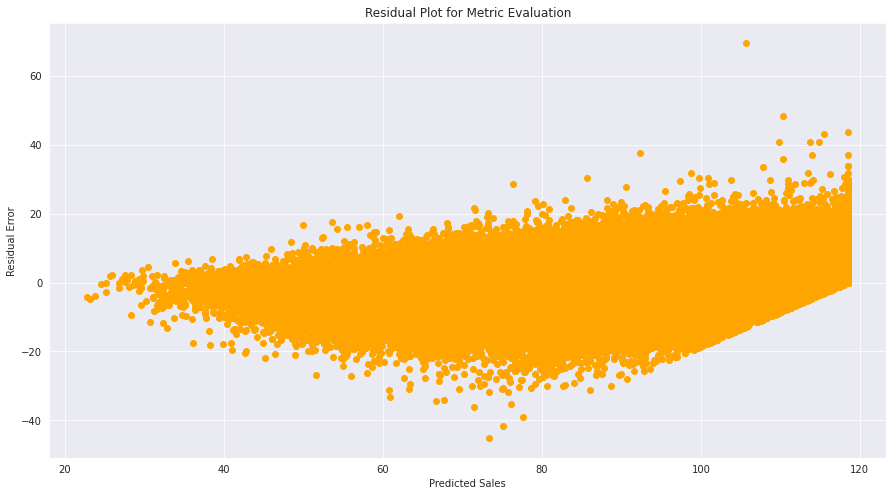

In [287]:
# # Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_tree_pred= y_test_tree_pred.reshape(-1,1)
residuals_DT = y_test - y_test_tree_pred
Mean= round(np.mean(residuals_DT),2)
Median= round(np.median(residuals_DT),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="orange")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [288]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create an instance of DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split':[2,4]}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train, y_train)

# Make predictions on the training and test data
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Print the best hyperparameters and negative mean squared error
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Negative mean squared error: {grid_search.best_score_}")


Best hyperparameters: {'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 4}
Negative mean squared error: -41.19900796930809


In [289]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_pred,y_test,y_test_pred)

--------------------------------------------------
MAE on train is: 4.548945381581611
MAE on test is: 4.9595337169509754
--------------------------------------------------
MSE on train is: 34.21155292773438
MSE on test is: 40.45587311249913
--------------------------------------------------
RMSE on train is: 5.8490642779622775
RMSE on test is: 6.360493150102367
--------------------------------------------------
MAPE on train is: 5.699060997279308  %
MAPE on test is: 6.211415375331994  %
--------------------------------------------------
R2 on train is: 0.8722100772495247
R2 on test is: 0.8487319384360064
--------------------------------------------------
Accuracy of train is: 94.3009390027207  %
Accuracy of test is: 93.788584624668  %
--------------------------------------------------


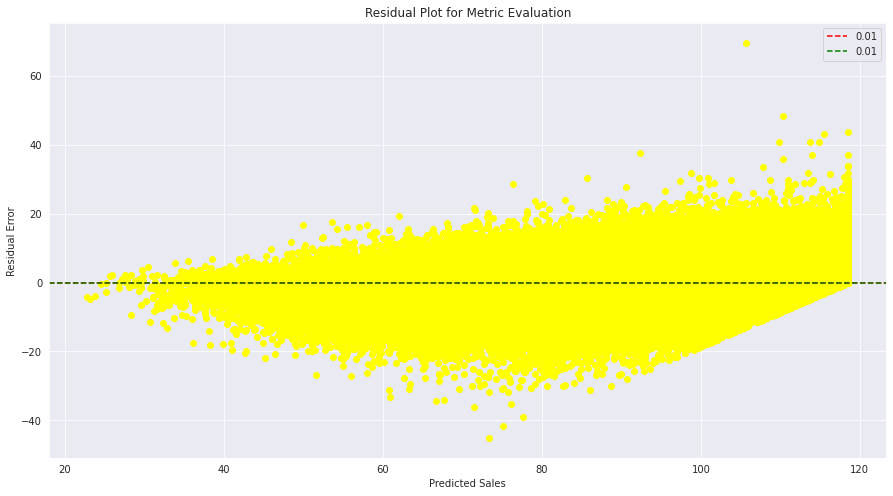

In [290]:
# Calculating residuals
y_test_pred= y_test_pred.reshape(-1,1)
residuals_RF = y_test - y_test_pred
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="Yellow")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

#Model- 3 - Random Forest Regressor

In [291]:
# ML Model - 3 Implementation
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18) 
  
# fit the regressor with X and Y data
RF_TreeR.fit(x_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(x_train)
y_test_RFtree_pred= RF_TreeR.predict(x_test)

In [292]:
# Calculating  Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

--------------------------------------------------
MAE on train is: 3.92003120334697
MAE on test is: 4.872514850744381
--------------------------------------------------
MSE on train is: 25.843644244956817
MSE on test is: 39.04179754068464
--------------------------------------------------
RMSE on train is: 5.083664450468462
RMSE on test is: 6.24834358375759
--------------------------------------------------
MAPE on train is: 4.902726184451912  %
MAPE on test is: 6.102568181662009  %
--------------------------------------------------
R2 on train is: 0.9034666064814467
R2 on test is: 0.8540192911538318
--------------------------------------------------
Accuracy of train is: 95.09727381554809  %
Accuracy of test is: 93.89743181833799  %
--------------------------------------------------


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have chosen Random Forest Regressor as our final prediction model  as it is very clear from abovemodels that it has given the highest accuracy (95%), and r2 score(0.90) on the testing dataset among all other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

One machine learning model that can be used to predict sales in the Rossman dataset is the Random Forest regressor. Random Forest is an ensemble method that combines multiple decision trees to make a prediction. Each decision tree in the Random Forest is trained on a random subset of the training data and a random subset of features, which helps to reduce overfitting and improve the generalization performance of the model.

# **Conclusion**

### **For EDA**

EDA  helps to provide a deeper understanding of the data and helps to guide the direction of further analysis. After performing EDA we have drawn the following conclusions:

* Sales vs Customers graph shows positive correlation between 'Sales' and 
'Customers'. As the number of customers increases, the sales also tend to increase.
* December being a festive month attracts more sale than the rest of the months. Also, November has slightly more sales than other months. This could be due to the 'Black Friday' sale which is very popular across the globe. As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.
* Day 1 and day 7 witness the highest sale indicating they are probably days falling on the weekend. Day 2 to day 6 generate medium to low sales indicating they are probably weekdays where customer footfall is low.
* As stores are getting promoted, more sales are getting generated.
* Plot between StateHolidays and sales shows that during Easter and Christmas holiday sales are actually high but for other holiday such as public ,sales are comparatively low.
* Sales for the store type b is the highest . Store type B might be located in a more affluent or high-traffic area, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales.
* Sales are highest for the assortment b . This assortment may have a good mix of products that are in high demand or that are unique to the store, which would result in more sales.
* We observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.
* We can conclude that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.
* From plot sales and competition Open Since Month shows sales go increasing from Novemmber and highest in month December. This may be due to Christmas eve and New Year.
* We can conclude from sales vs promo2 graph that customers are slightly less responsive to the stores(i.e sales) that are running consecutive promotions. One possibility could be customers might have already taken advantage of a similar promotion earlier. Another reason could be store might not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales. Also, if the store is running same promotion again and again, it could have resulted into lower customer footfal and ultimately leadind to fewer sales.
* Sales vs Promo2SinceYear barplot explains that sales were still the highest when the store wasn't running any consecutive promotional events. But in 2014, the sales were really shoot up and they are recorded as 2nd highest. Good quality products, better deals, shutdown of competitions etc could be the reasons.
* We can see the promo interval Jan, Apr, Jul, Oct records the 2nd highest sales as it marks the festive season. However, the other intervals are recording sales that are close to the 1st interval.

###**For ML Model**

Close predictions of any ML model exceedingly affects the commercial enterprise boom. Before going to in addition version deployment one should have to test how correctly the version is predicting and acting with the actual life records.

Conclusions drawn from any version are very useful to perceive wheather the version is absolutely baked and suitable to go for deployment technique or desires in addition refinement. In this section first we are able to communicate approximately a few trendy points which are essential for each ML model and then will speak about the challenge oriented conclusions we made:

We have implemented various regression model started with Linear Regression and then we have tried other non linear models too. For each of the model we have tried to tune the hyperparameters as well in order to minimize the errors and drawn following conclusions

* In Linear Regression we got the accuracy of ~93% and the model is capturing 82% of variance even after using regularization techniques that means our data is not perfectly linearly dependent with target variable(Sales).

* Then I performed Ridge Regression to my model but the ridge model is also giving sam result.Then again I have use Lasso regression but the result was same there is no high change in my model set

* For Decsion Tree we have achieved ~94% accuracy with maximum depth of 15 and on increasing the depth over it we are falling towards overfitting and MAPE of 3.6% which ultimately increases the mean absolute percentage error.

* Ensemble technique i.e Random Forest has given the accuray of ~95.% total trees of 100 in the forest and got the value of R2 score is 90.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***